The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [168]:
df.shape

(907, 27)

The dataset Contains 907 rows and 27 columns where 25 are independent variables and 2 is target variable capacity_mw and primary_fuel.

In [169]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

This dataset contains two types of data:float64 and object

In [170]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [172]:
df["country"].value_counts()

IND    907
Name: country, dtype: int64

There is only 1 country in the dataset wo we can drop this as it has nothing to do with our prediction also we can drop the column country_long on this basis

In [173]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

Dropping unnecessary columns as per me they are playing no role in prediction of  both the target variables

In [174]:
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [175]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Here we can observe that the name column has unique name for each power plant so dropping this column as well

In [176]:
df.drop(['name'],axis=1,inplace=True)

In [177]:
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.

In [178]:
df.drop('gppd_idnr',axis=1,inplace=True)

The column Owner has more than 65% of null values also it may not important for prediction, so we can drop it

In [179]:
df.drop('owner',axis=1,inplace=True)

The column url also have no relation with the targets and it has nothing to do with prediction so we can drop it as well.

In [180]:
df.drop('url',axis=1,inplace=True)

In [181]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

So here we can see there are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

In [182]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers

In [183]:
df['latitude'].mean()   

21.1979181184669

In [184]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode method.

In [185]:
df['other_fuel1'].mode()   

0    Oil
Name: other_fuel1, dtype: object

In [186]:
df['geolocation_source'].mode()

0    WRI
Name: geolocation_source, dtype: object

In [187]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [188]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

The columns longitude,commissioning year,generation_gwh_2014, generation_gwh_2015, generation_gwh-2016 and generation_gwh_2017,generation_gwh_2018 are numerical type and have huge outliers and skewness so will replace missing values using median method.

In [189]:
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

Dropping generation_gwh_2013 and generation_gwh_2019 columns as it has all NaN values which are of no use to us.

In [190]:
df.drop('generation_gwh_2013',axis=1,inplace=True)

In [191]:
df.drop('generation_gwh_2019',axis=1,inplace=True)

In [192]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<Axes: >

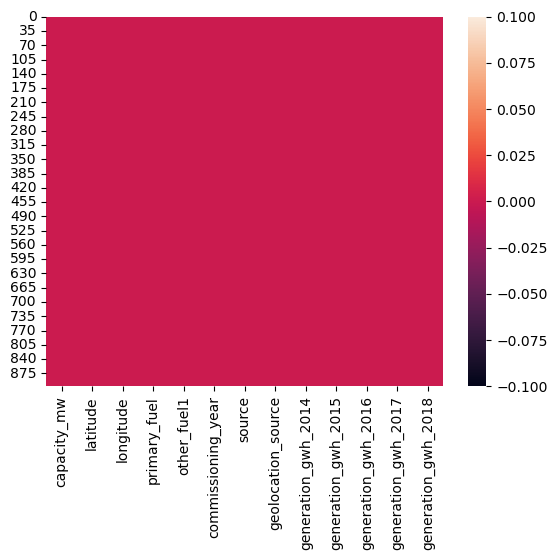

In [193]:
sns.heatmap(df.isnull())

From the above heatmap it is clear that there is no missing values present in our dataset

In [194]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

Here we have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [195]:
df

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  Power_plant_age  
0             751.644375              7.0  
1             751.644375             17.0  
2             751.644375             17.0  
3             626.239128             14.0  
4            7279.000000              3.0  
..                   ...              ...  
902           686.500000              2.0  
903           751.644375             17.0  
904           751.644375             17.0  
905           751.644375             17.0  
906           751.644375             17.0  

[907 rows x 13 columns]

Now we have 907 rows and 13 columns

In [196]:
df.describe()

capacity_mw    latitude   longitude  generation_gwh_2014  \
count   907.000000  907.000000  907.000000           907.000000   
mean    326.223755   21.197918   77.427103          1516.689956   
std     590.085456    6.079148    4.815073          2785.604307   
min       0.000000    8.168900   68.644700             0.000000   
25%      16.725000   17.072000   74.388900           801.123775   
50%      59.200000   21.281800   76.719500           801.123775   
75%     385.250000   25.176450   79.206100           801.123775   
max    4760.000000   34.649000   95.408000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1510.071296          1565.361383          1657.121797   
std            2984.994556          3005.087210          3046.862910   
min               0.000000             0.000000             0.000000   
25%             711.181225           737.205450           817.977250   
50%             711.181225           737.205450           817.977250   
75%             711.181225           737.205450           817.977250   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  Power_plant_age  
count           907.000000       907.000000  
mean           1665.011030        19.271224  
std            3168.826750        13.158621  
min               0.000000         0.000000  
25%             751.644375        15.000000  
50%             751.644375        17.000000  
75%             751.644375        20.000000  
max           35136.000000        91.000000

From the above we observe that
1.The count is same for all columns which means there are no missing values present in the dataset
2.The Mean is more than the Median(50%) in all the columns except latitude which means data is skewed to right for these columns
3.The Mean is bit less than the Median(50%) in the column latitude which means data is skewed to left for this column
4.From the difference between maximum and 75% we can observe that there are huge outliers present in most of the columns

In [197]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [198]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


Univariate Analysis

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


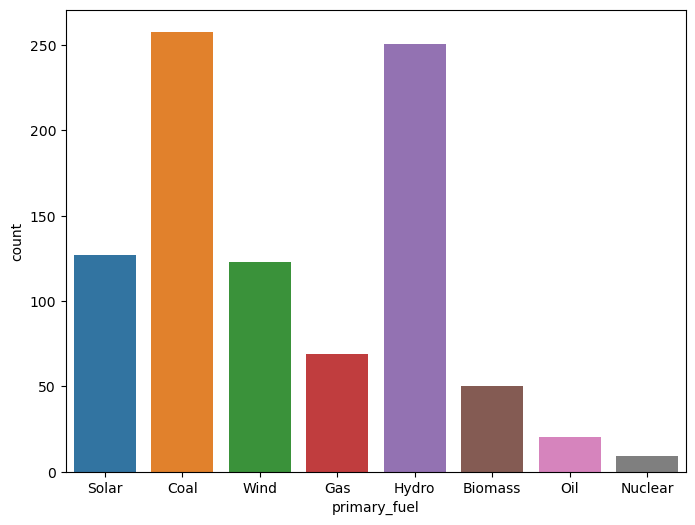

In [199]:
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=df['primary_fuel'])
plt.show()

Here using the source Coal(thermal) generates more electricity followed by Hydro(water) . Also the energy source Nuclear generates very less electricity compare to others.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


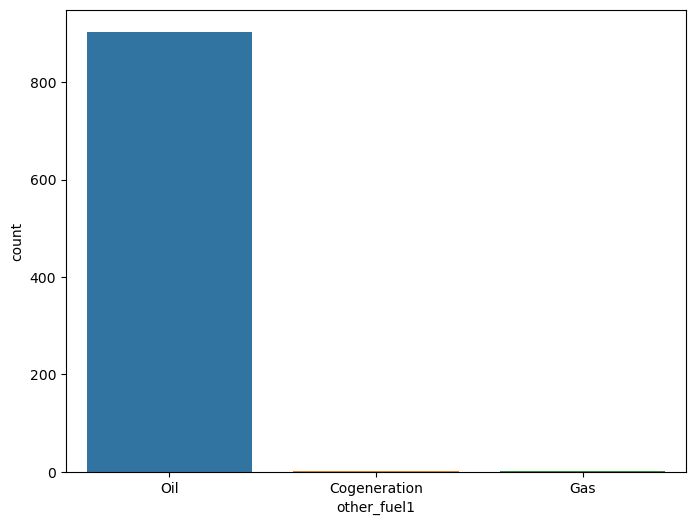

In [200]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=df['other_fuel1'])
plt.show()

Here we can see there are 3 unique values in other_fuel1 and the count of oil is higher than cogeneration and gas

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


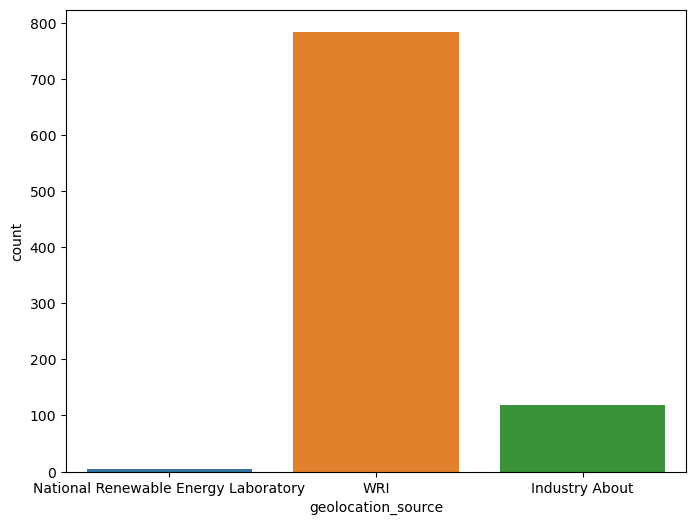

In [201]:
print(df['geolocation_source'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=df['geolocation_source'])
plt.show()

It is clear from the above plot that the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geolocation information compare to other two sources.

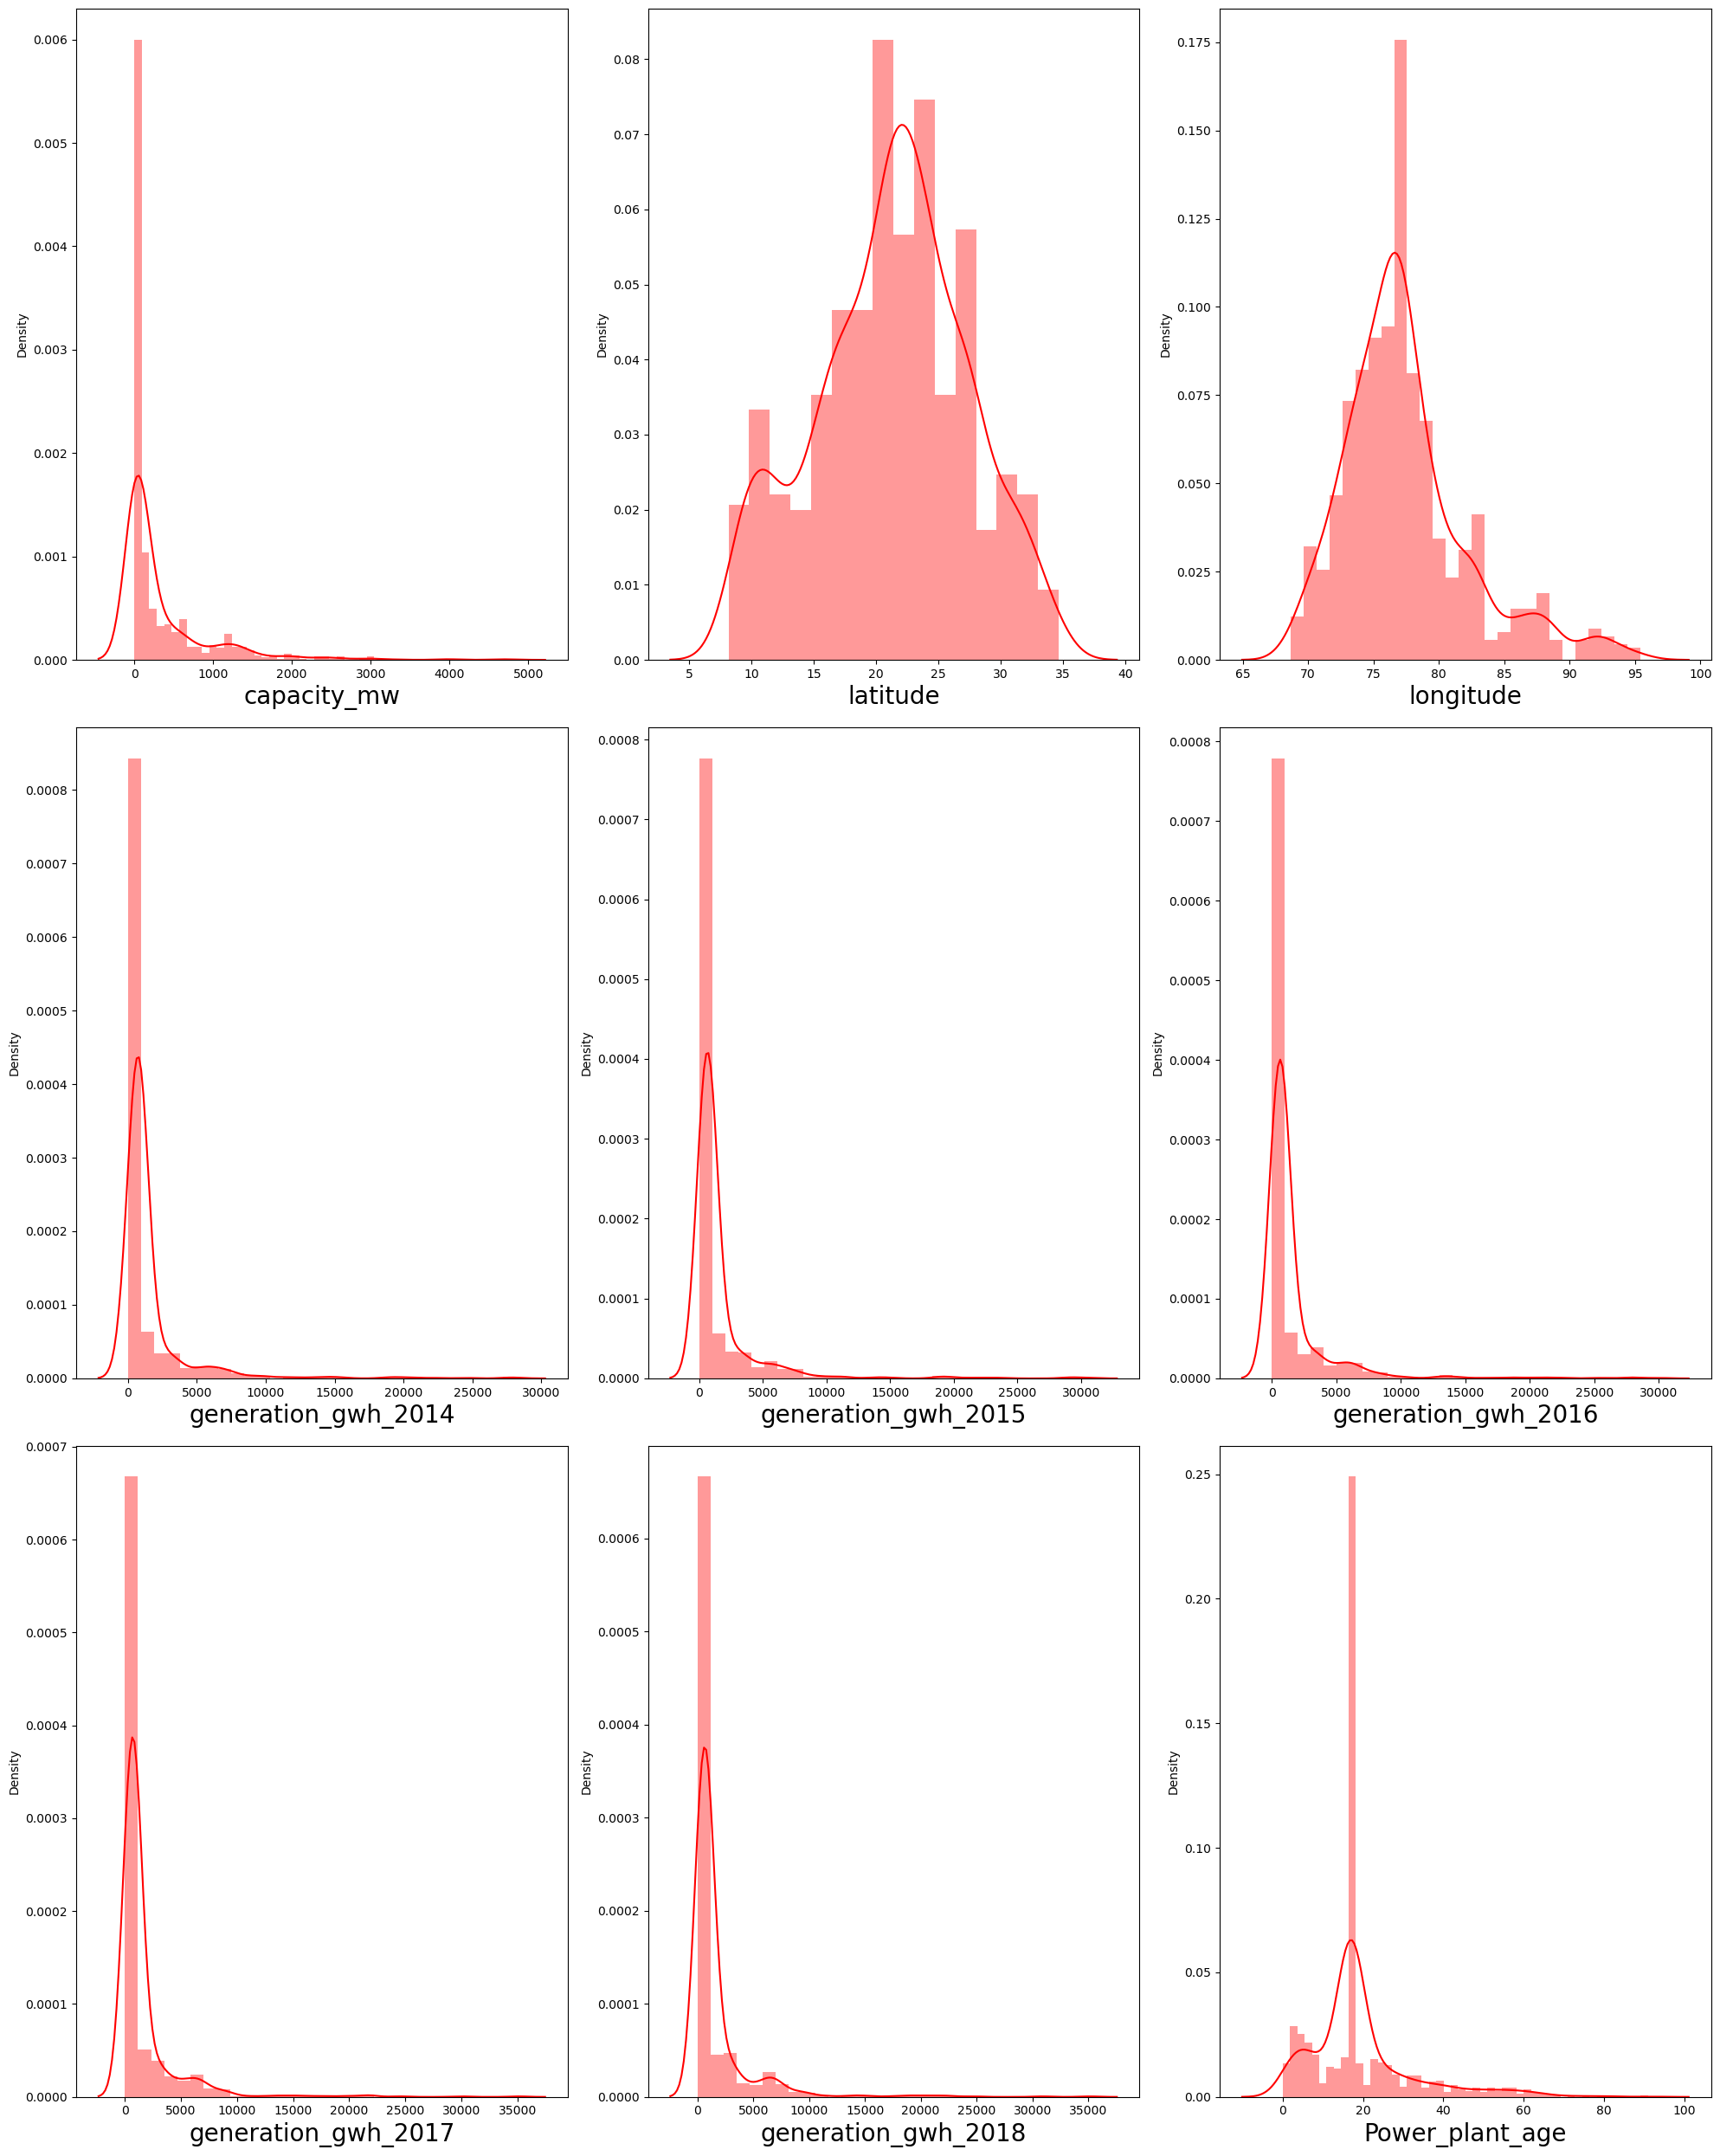

In [202]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Bivarient Analysis

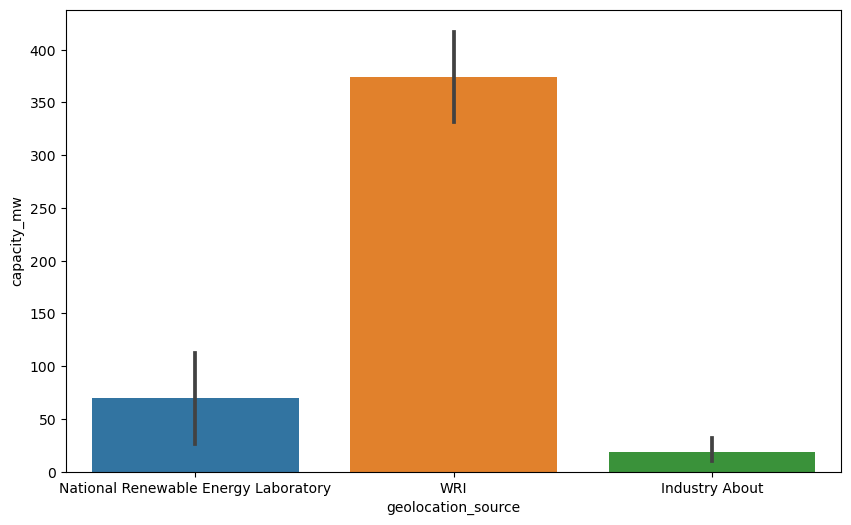

In [203]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

The capacity of geolocation_source WRI is maximum which has capacity  of more than 350 mega watts, the geolocation_source Industry About has less capacity

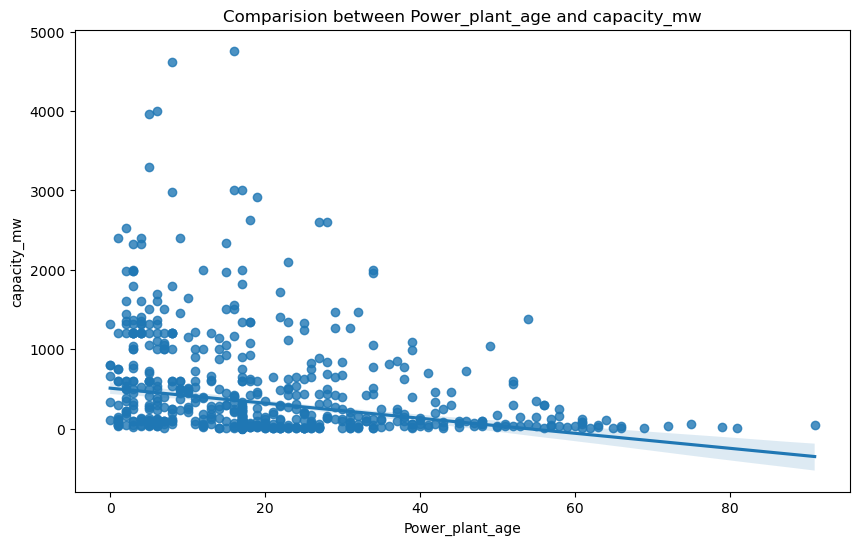

In [204]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x=df['Power_plant_age'],y=df['capacity_mw']);

From the above plot we can observe that there is non-linear relationship between feature and label also we can see that the capacity of older power plants is very less compared to the power plants which are started recently

<Axes: title={'center': 'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

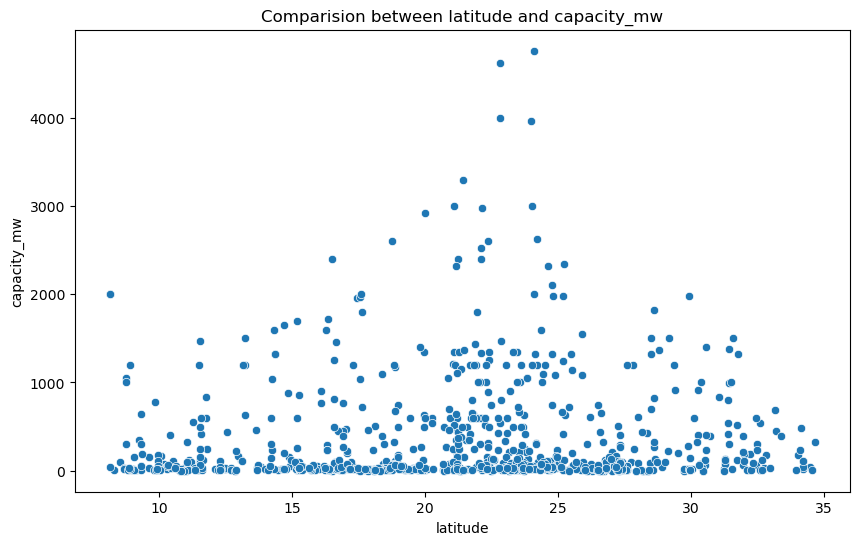

In [205]:
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(x=df['latitude'],y=df['capacity_mw'])

From the above plot we see that there is no relation between latitude and capacity of the power plant also We can see that capacity of power plant is very less

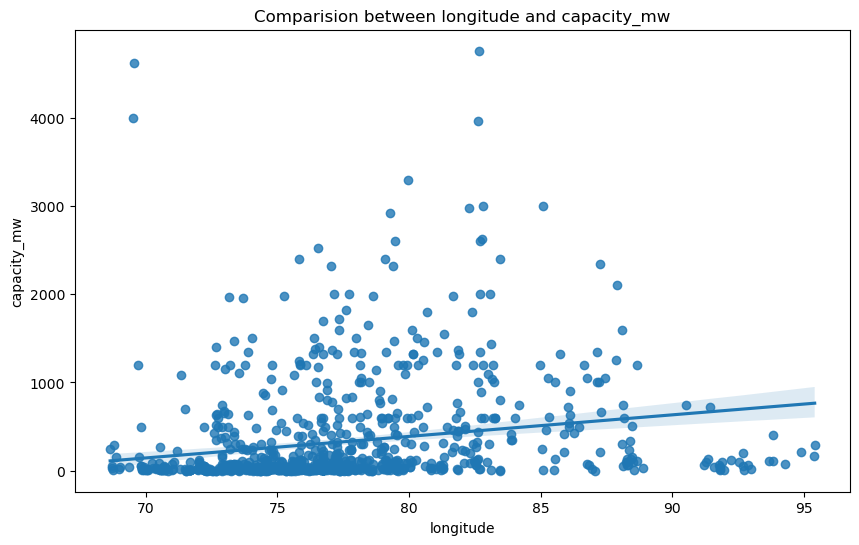

In [206]:
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(x=df['longitude'],y=df['capacity_mw']);

There is very less linear relation between longitude and capacity, here the longitude range from 75-80 has more capacity.

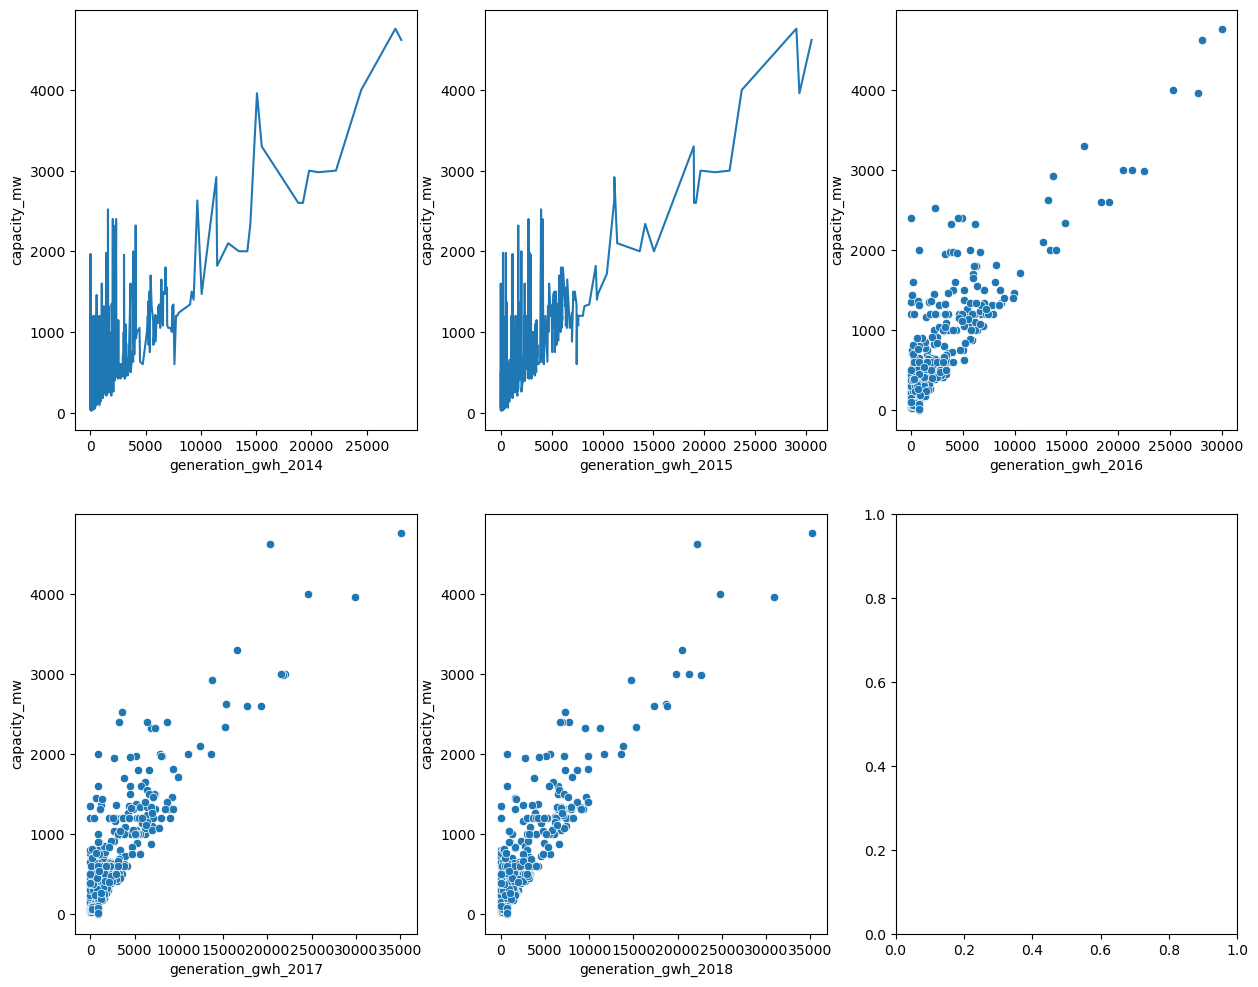

In [207]:
fig,axes=plt.subplots(2,3,figsize=(15,12))

sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df)
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df)
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[0,2],data=df)
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,0],data=df)
sns.scatterplot(x='generation_gwh_2018', y='capacity_mw',ax=axes[1,1],data=df)
plt.show()

There is positive linear relationship between the capacity and the electricity generation reported for the years mentioned
From the plot it is clear that electricity generation reported for the years 2014 , 2015, 2016, 2017 and 2018 have high capacity as the electricity generation is increasing, the capacity of plant is also increasing

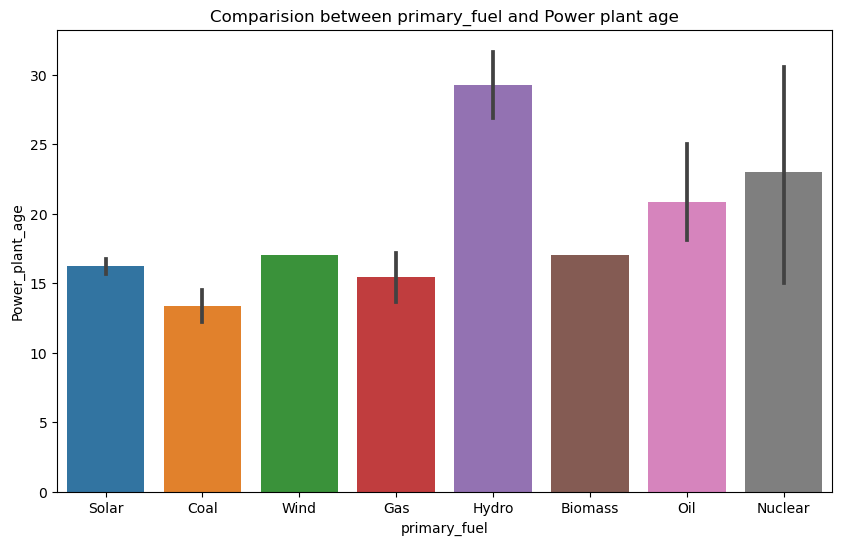

In [208]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age")
sns.barplot(x='primary_fuel',y='Power_plant_age', data=df)
plt.show()

From the above plot we can see most of the power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil

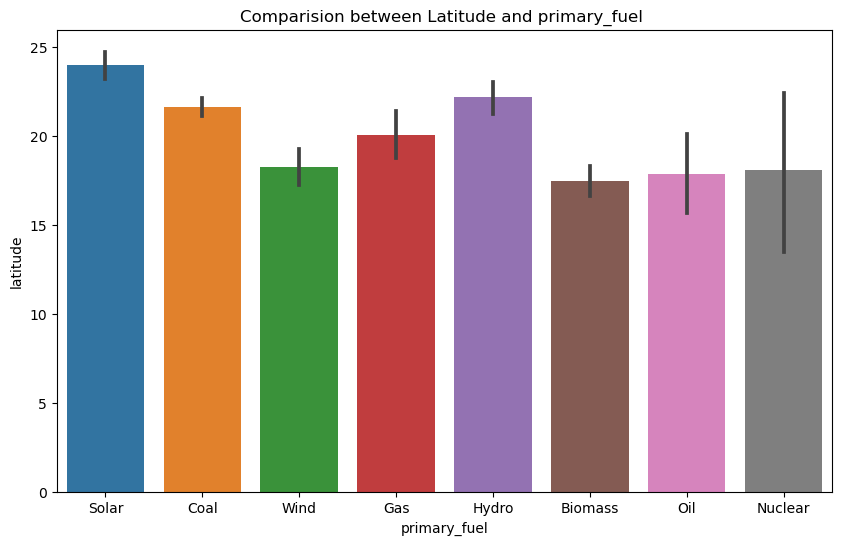

In [209]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Latitude and primary_fuel ")
sns.barplot(x=df['primary_fuel'],y=df['latitude']);

So here we can observe that the fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas other types have less latitude

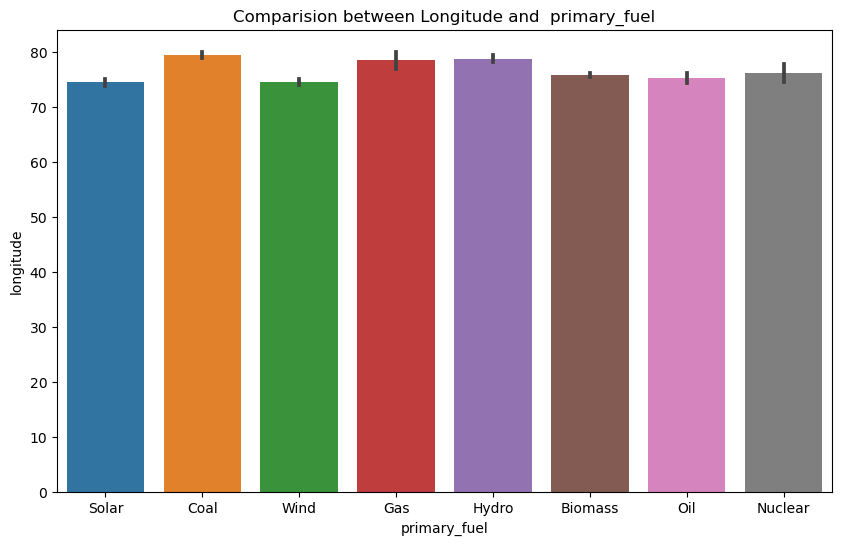

In [210]:
plt.figure(figsize = [10,6])
plt.title("Comparision between Longitude and  primary_fuel")
sns.barplot(x=df['primary_fuel'],y=df['longitude']);

The fuel type Gas has high longitude followed by Hydro , Solar and Coal other fuel types have very less longitude.

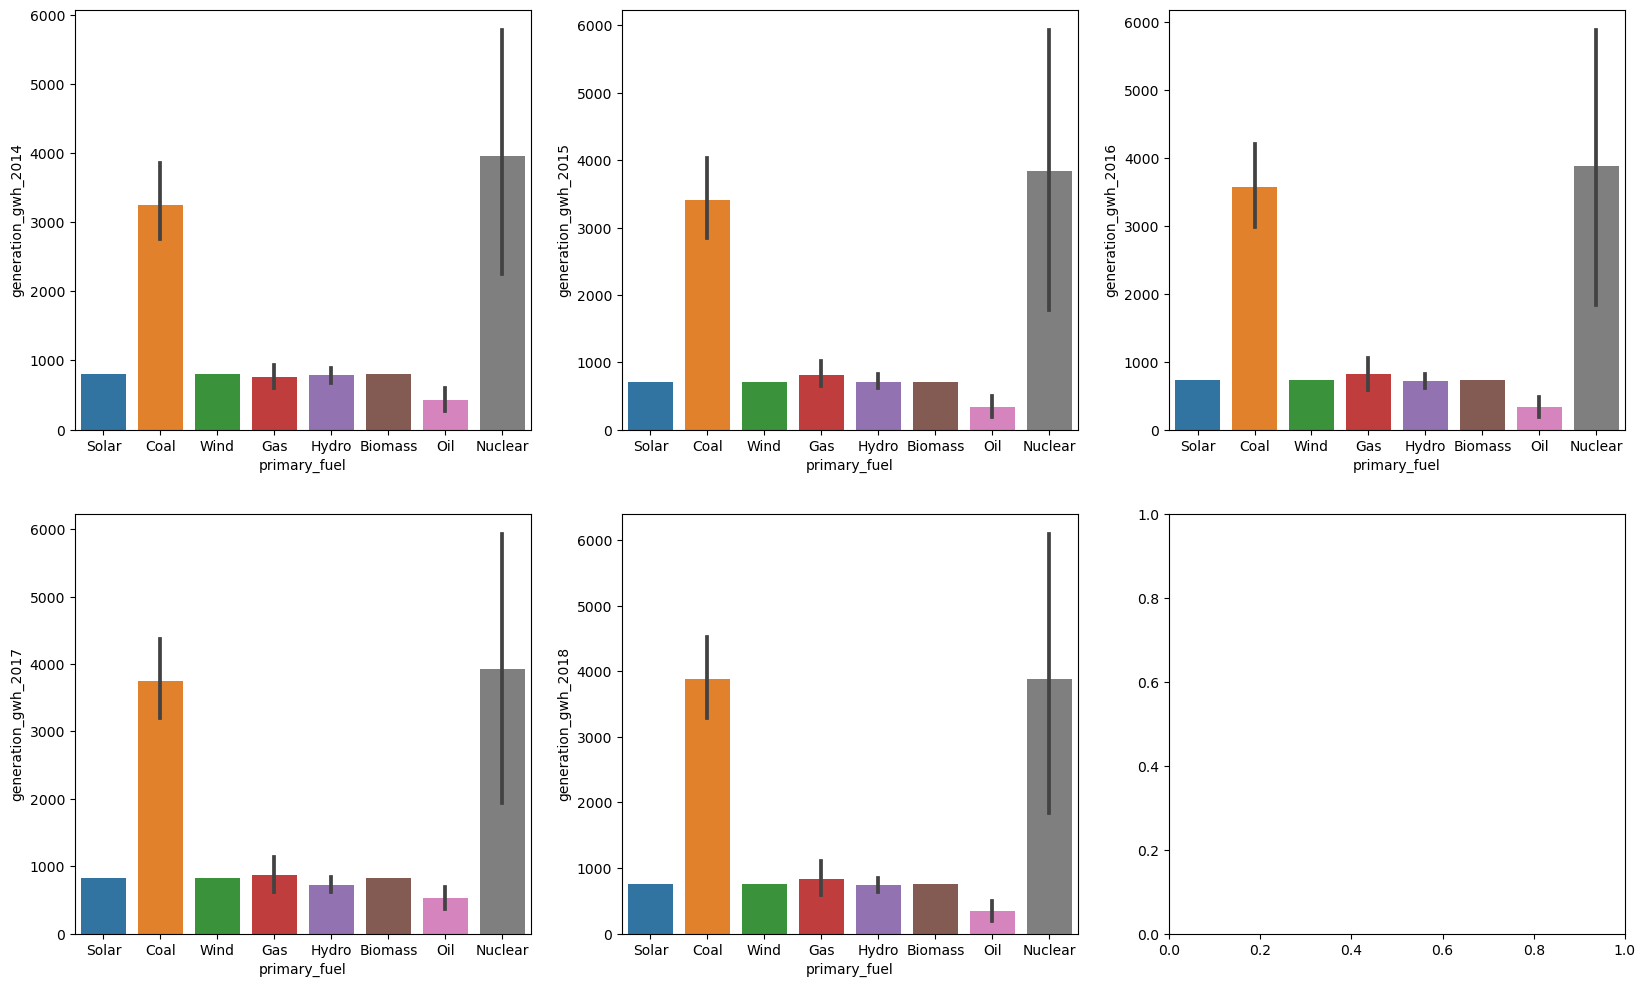

In [211]:
fig,axes=plt.subplots(2,3,figsize=(20,12))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[0,2],data=df)
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,0],data=df)
sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[1,1],data=df)
plt.show()

From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.
Other fuel types have very less power generation reports.

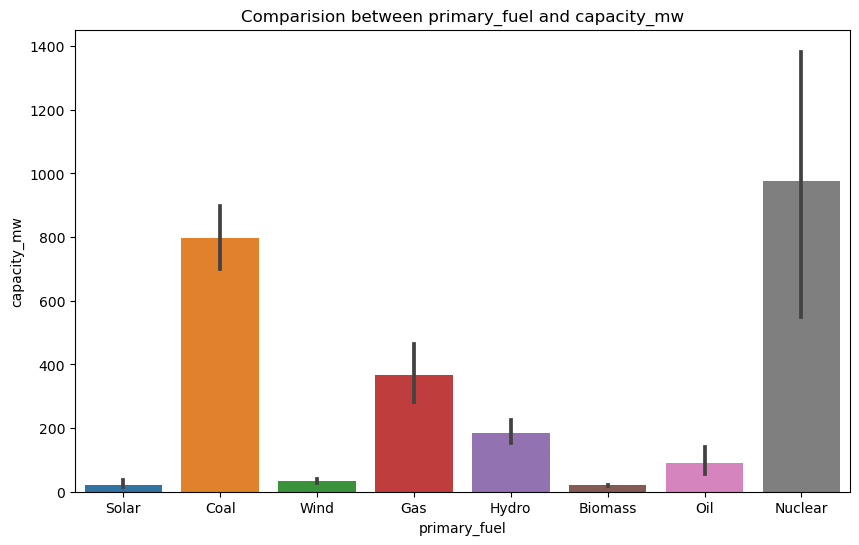

In [212]:
plt.figure(figsize=(10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x= 'primary_fuel',y = 'capacity_mw',data = df)
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

Multivariate Analysis


Since we have 2 target variables capacity_mw and primary_fuel will check with both the targets separately

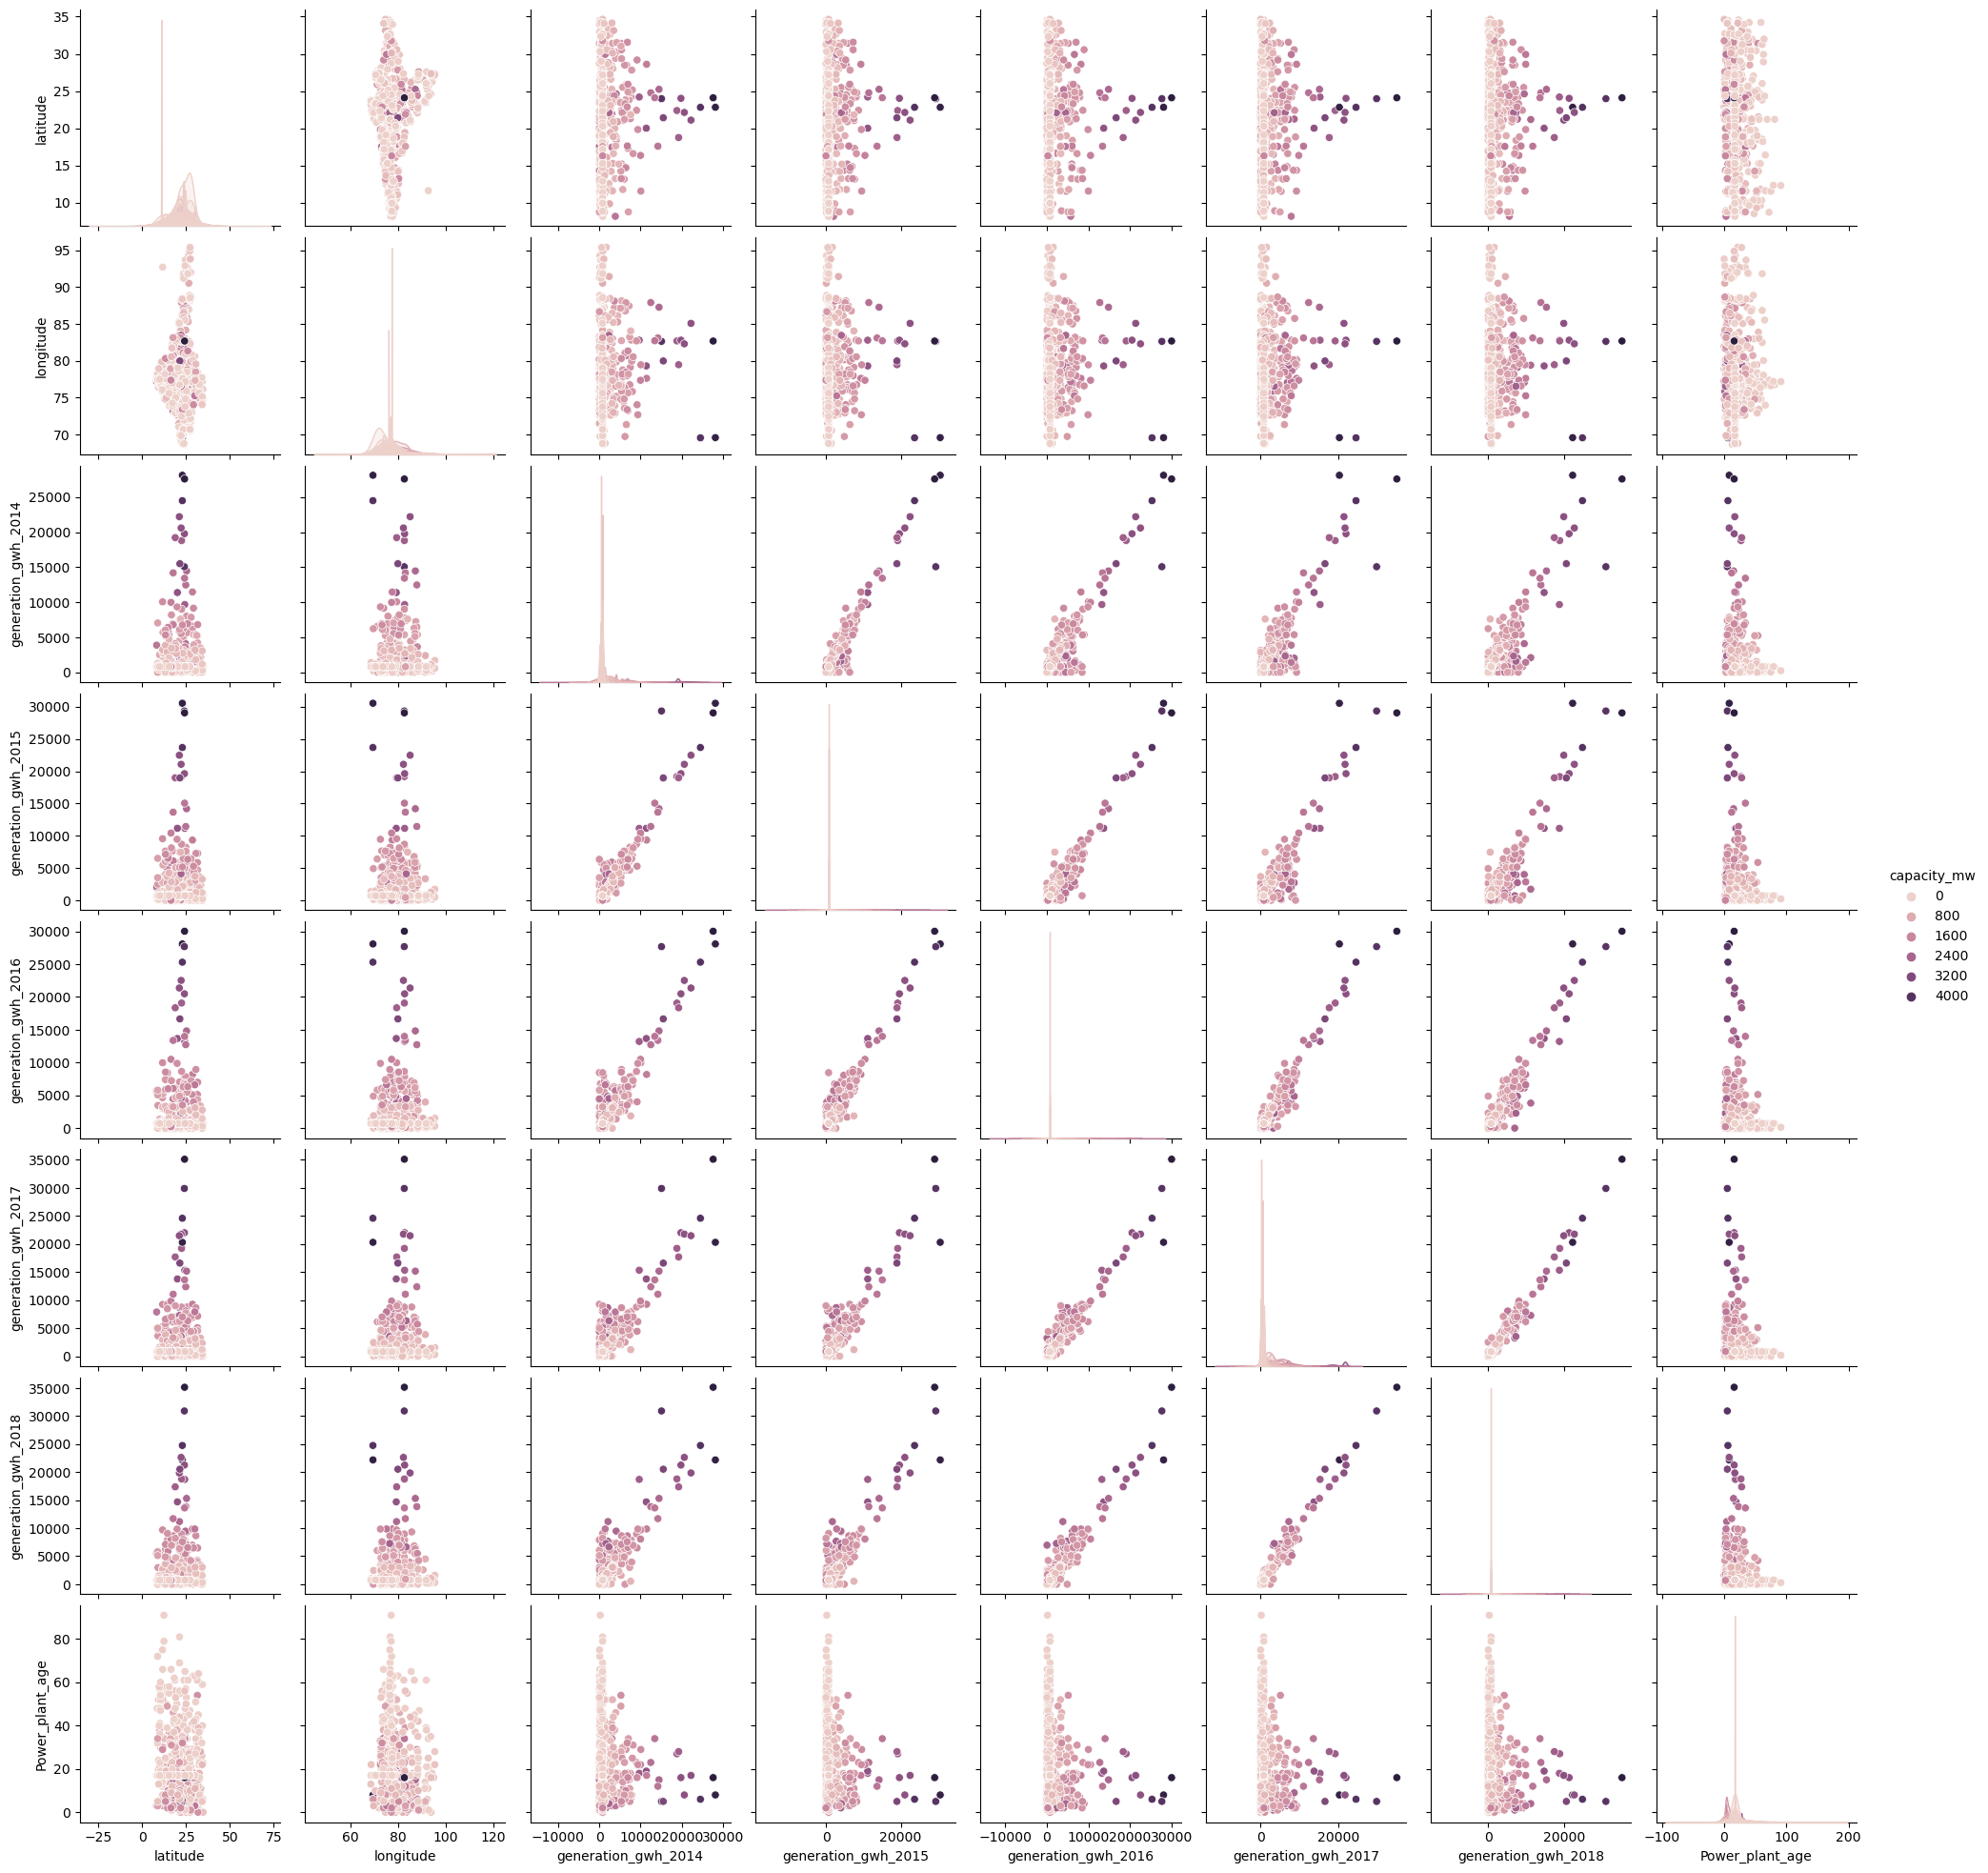

In [213]:
sns.pairplot(df,hue='capacity_mw')

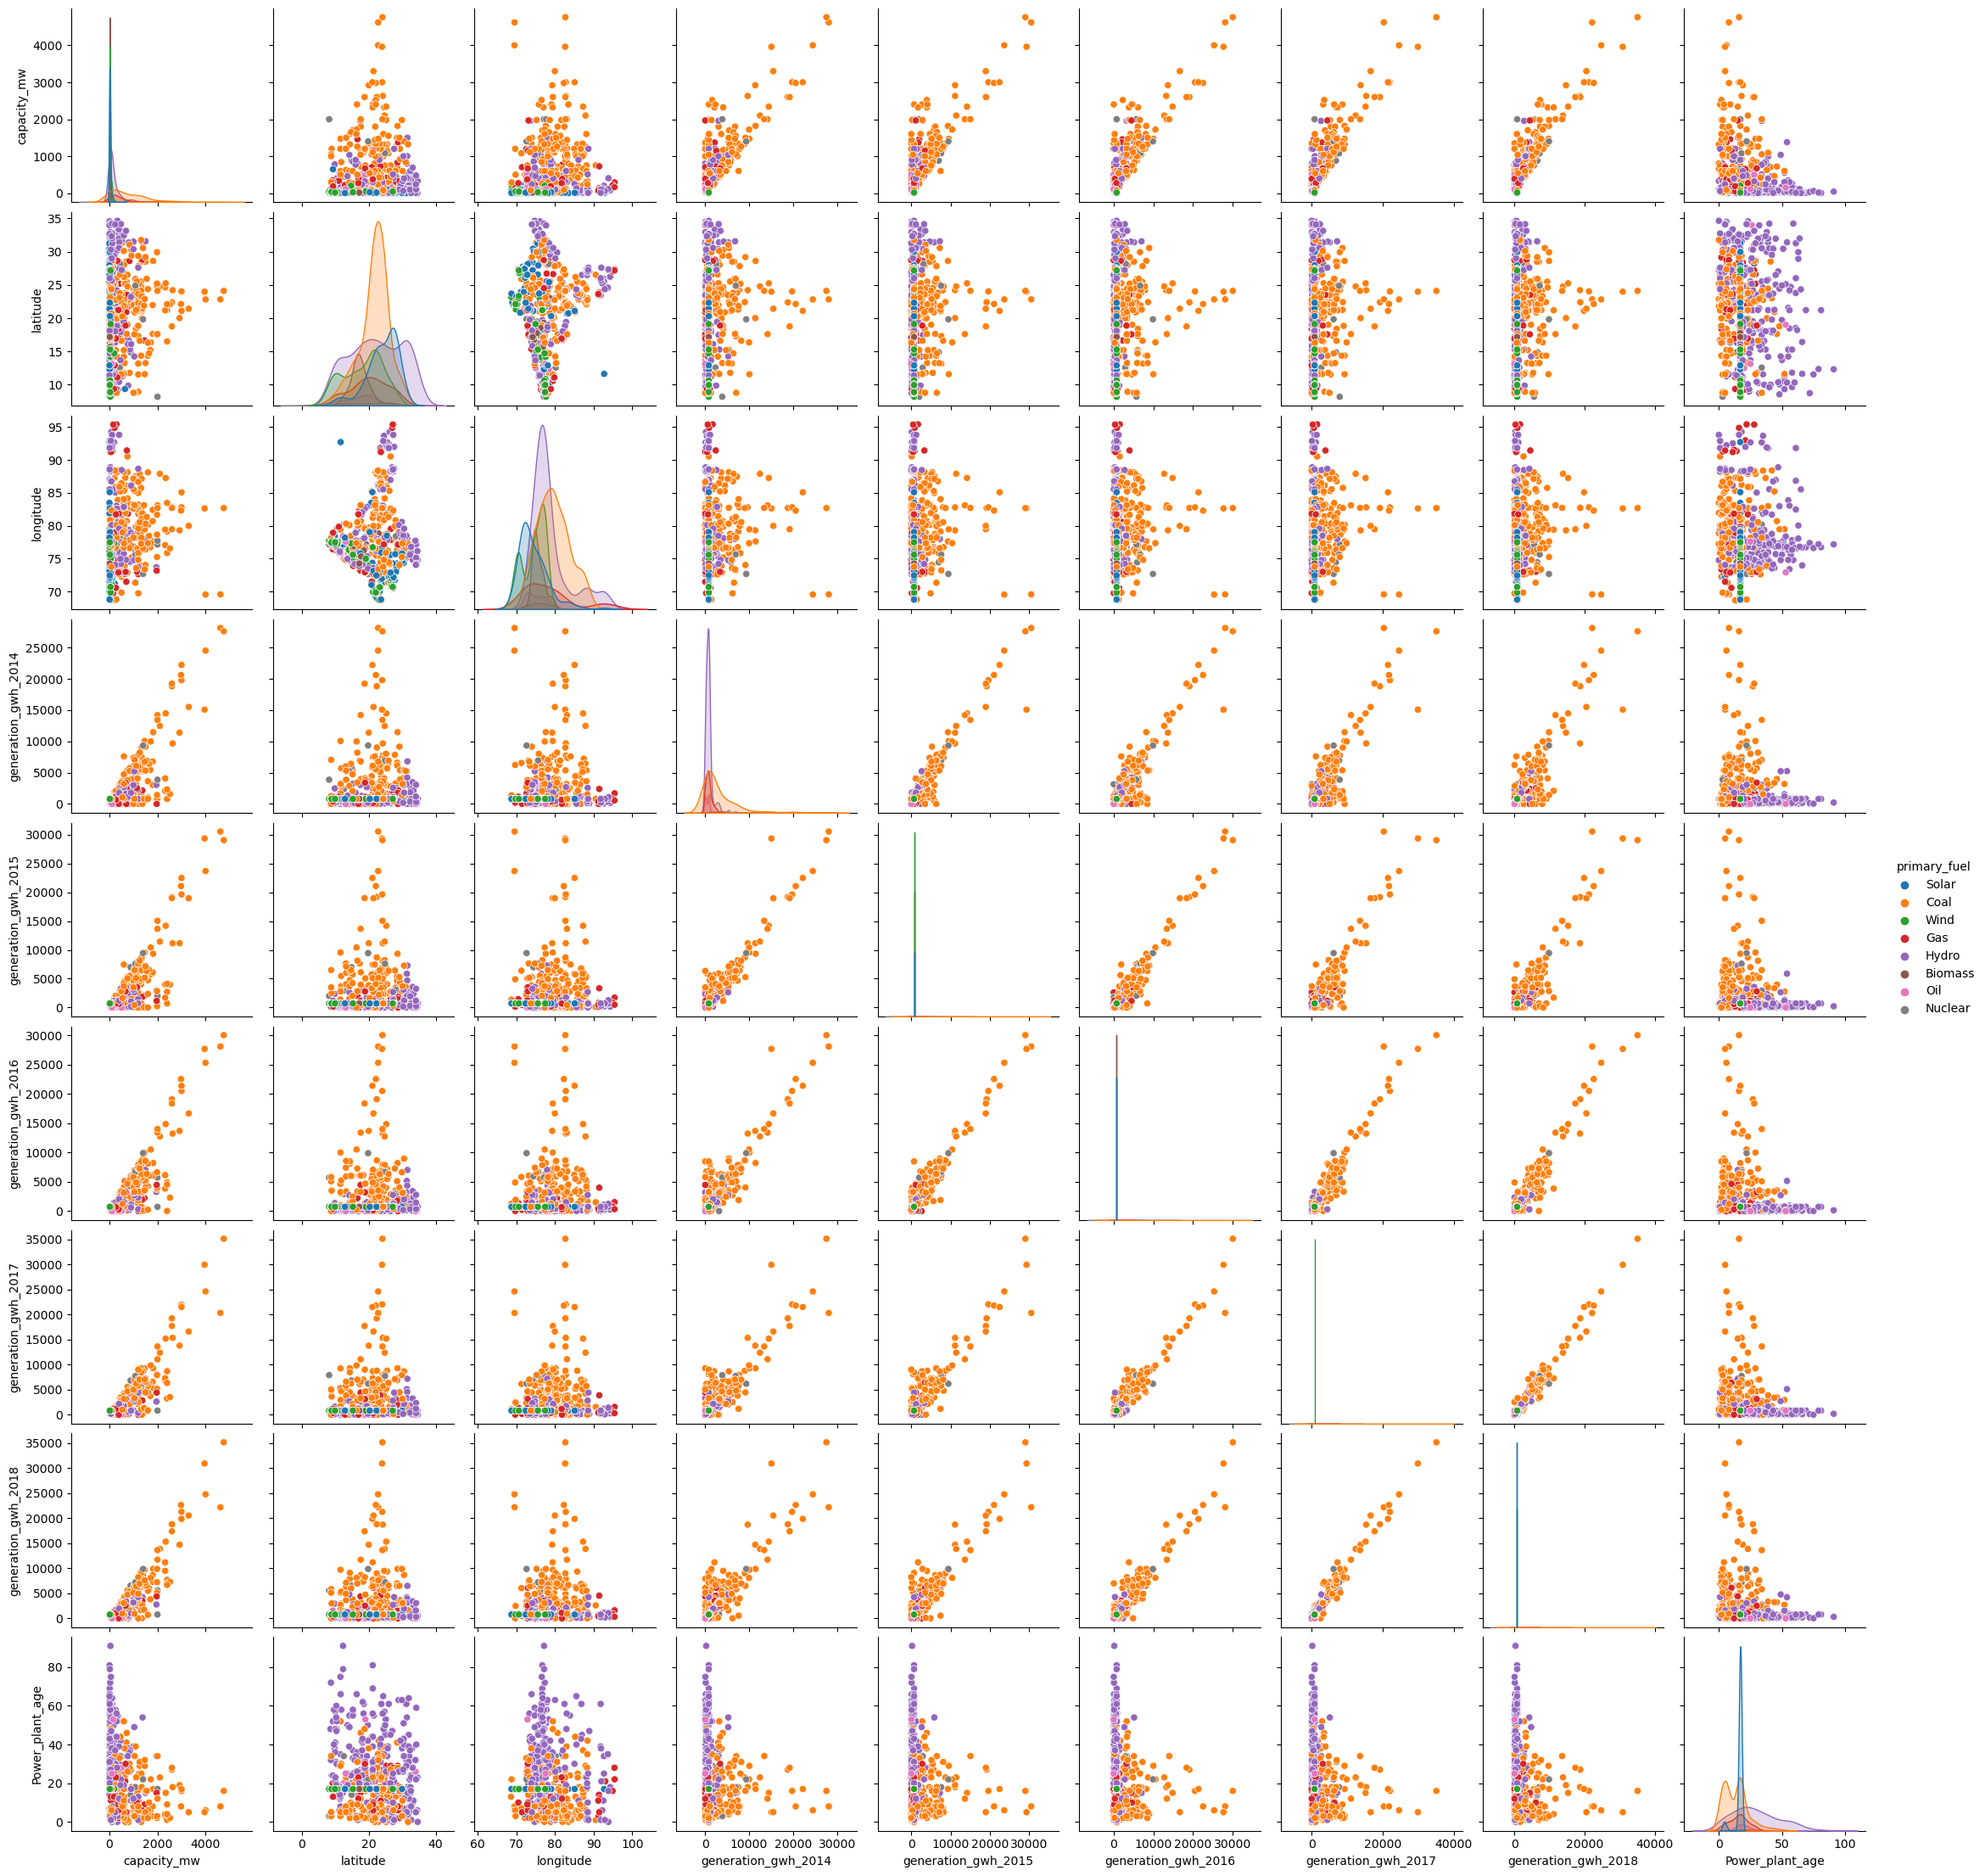

In [214]:
sns.pairplot(df,hue='primary_fuel')

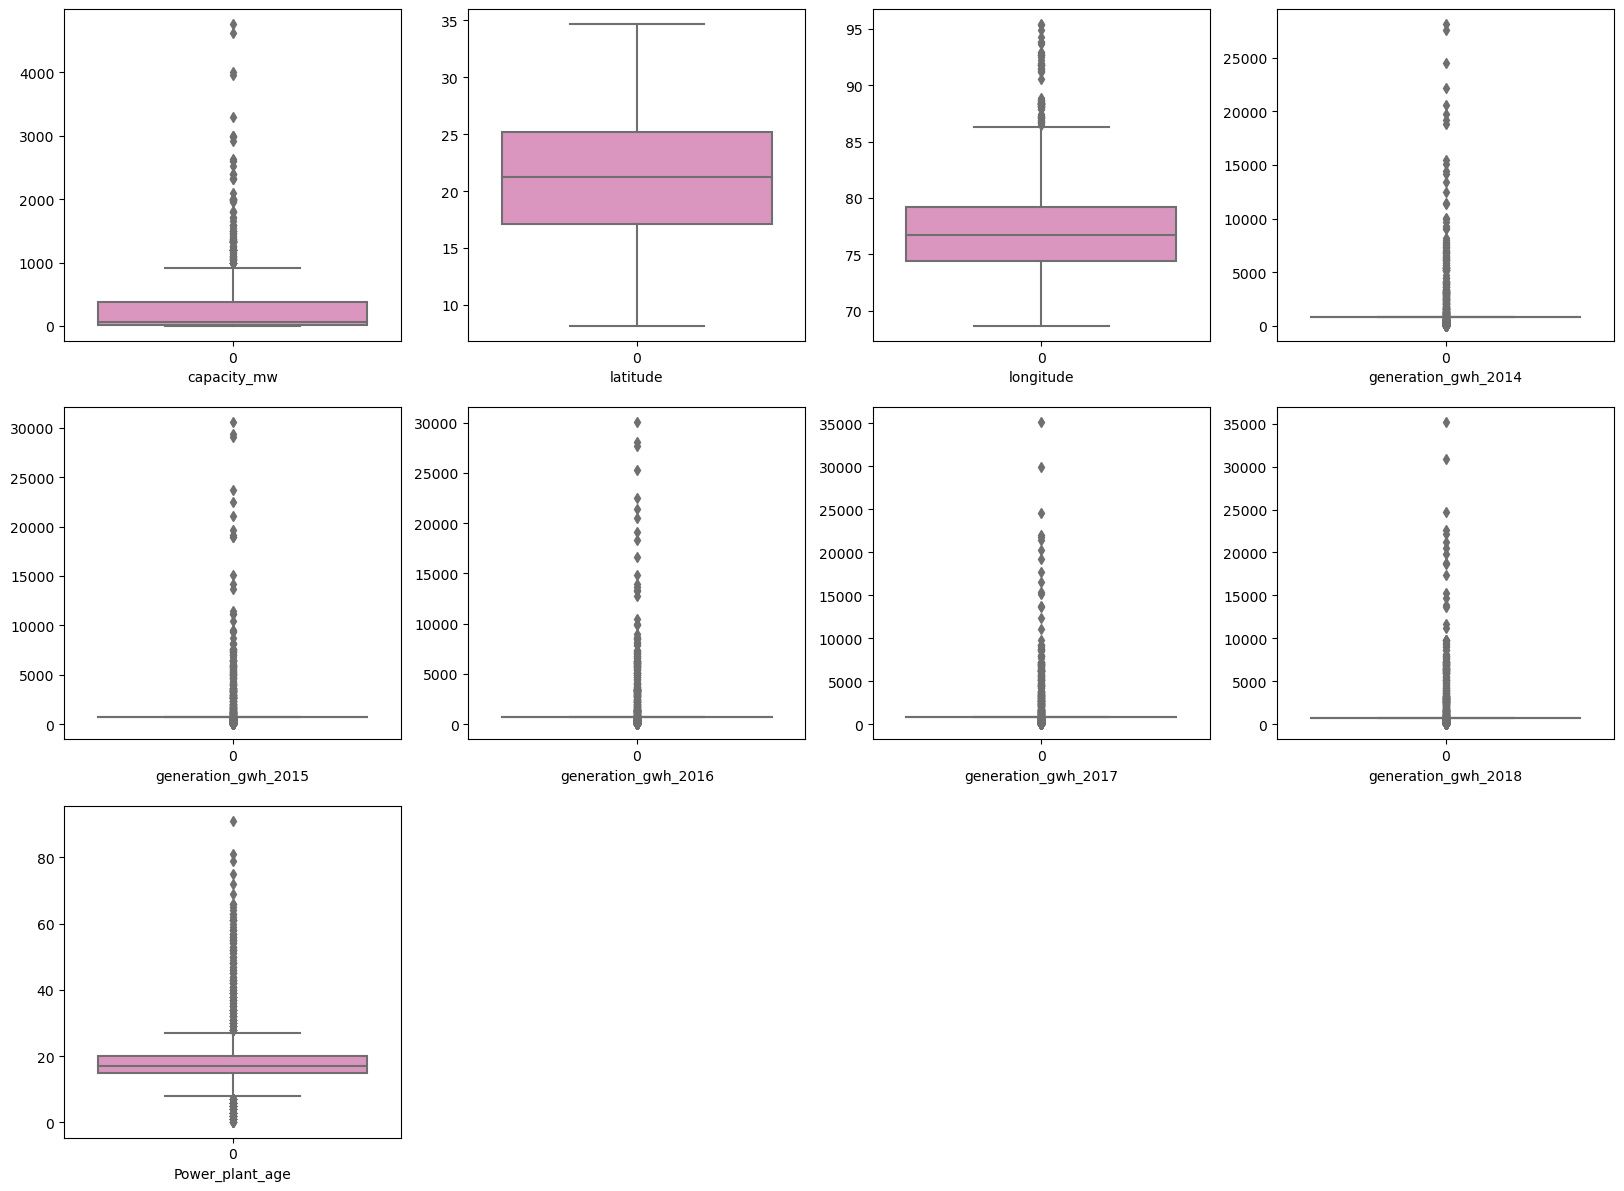

In [215]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

From the above plot we can see outliers present in all columns except latitude, target column has outliers but no need to remove from it

In [216]:
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]
from scipy.stats import zscore
z=np.abs(zscore(features))
df= df[(z<3).all(axis=1)]
df

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  Power_plant_age  
0             751.644375              7.0  
1             751.644375             17.0  
2             751.644375             17.0  
3             626.239128             14.0  
4            7279.000000              3.0  
..                   ...              ...  
902           686.500000              2.0  
903           751.644375             17.0  
904           751.644375             17.0  
905           751.644375             17.0  
906           751.644375             17.0  

[851 rows x 13 columns]

In [217]:
data_loss = (907-851)/907*100
data_loss

6.174200661521499

In [218]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

In [219]:
cor = df.corr()
cor

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.050588   0.257582     -0.398039   
latitude                0.050588  1.000000  -0.014145     -0.002561   
longitude               0.257582 -0.014145   1.000000     -0.382975   
primary_fuel           -0.398039 -0.002561  -0.382975      1.000000   
other_fuel1            -0.001758  0.037049   0.029191      0.006463   
source                 -0.275724  0.069430  -0.235719      0.038558   
geolocation_source      0.234543 -0.203340   0.263739     -0.478601   
generation_gwh_2014     0.620202  0.081661   0.119473     -0.250101   
generation_gwh_2015     0.680949  0.071346   0.154522     -0.276308   
generation_gwh_2016     0.750088  0.057301   0.195299     -0.286624   
generation_gwh_2017     0.788972  0.071296   0.196529     -0.289232   
generation_gwh_2018     0.815198  0.064558   0.204421     -0.298364   
Power_plant_age        -0.241487 -0.097033  -0.080034      0.074358   

                     other_fuel1    source  geolocation_source  \
capacity_mw            -0.001758 -0.275724            0.234543   
latitude                0.037049  0.069430           -0.203340   
longitude               0.029191 -0.235719            0.263739   
primary_fuel            0.006463  0.038558           -0.478601   
other_fuel1             1.000000  0.028471           -0.022827   
source                  0.028471  1.000000           -0.497893   
geolocation_source     -0.022827 -0.497893            1.000000   
generation_gwh_2014    -0.000530 -0.141496            0.113446   
generation_gwh_2015     0.006092 -0.156317            0.125329   
generation_gwh_2016     0.015479 -0.158561            0.127128   
generation_gwh_2017     0.011842 -0.156155            0.125199   
generation_gwh_2018     0.022700 -0.165232            0.132477   
Power_plant_age        -0.058103 -0.075353            0.051608   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.620202             0.680949   
latitude                        0.081661             0.071346   
longitude                       0.119473             0.154522   
primary_fuel                   -0.250101            -0.276308   
other_fuel1                    -0.000530             0.006092   
source                         -0.141496            -0.156317   
geolocation_source              0.113446             0.125329   
generation_gwh_2014             1.000000             0.912185   
generation_gwh_2015             0.912185             1.000000   
generation_gwh_2016             0.801237             0.907984   
generation_gwh_2017             0.746130             0.830394   
generation_gwh_2018             0.738063             0.821726   
Power_plant_age                -0.059768            -0.130252   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.750088             0.788972   
latitude                        0.057301             0.071296   
longitude                       0.195299             0.196529   
primary_fuel                   -0.286624            -0.289232   
other_fuel1                     0.015479             0.011842   
source                         -0.158561            -0.156155   
geolocation_source              0.127128             0.125199   
generation_gwh_2014             0.801237             0.746130   
generation_gwh_2015             0.907984             0.830394   
generation_gwh_2016             1.000000             0.932729   
generation_gwh_2017             0.932729             1.000000   
generation_gwh_2018             0.913720             0.964318   
Power_plant_age                -0.199087            -0.221382   

                     generation_gwh_2018  Power_plant_age  
capacity_mw                     0.815198        -0.241487  
latitude                        0.064558        -0.097033  
longitude                       0.204421        -0.080034  
primary_fuel                   -0.29836

<Axes: >

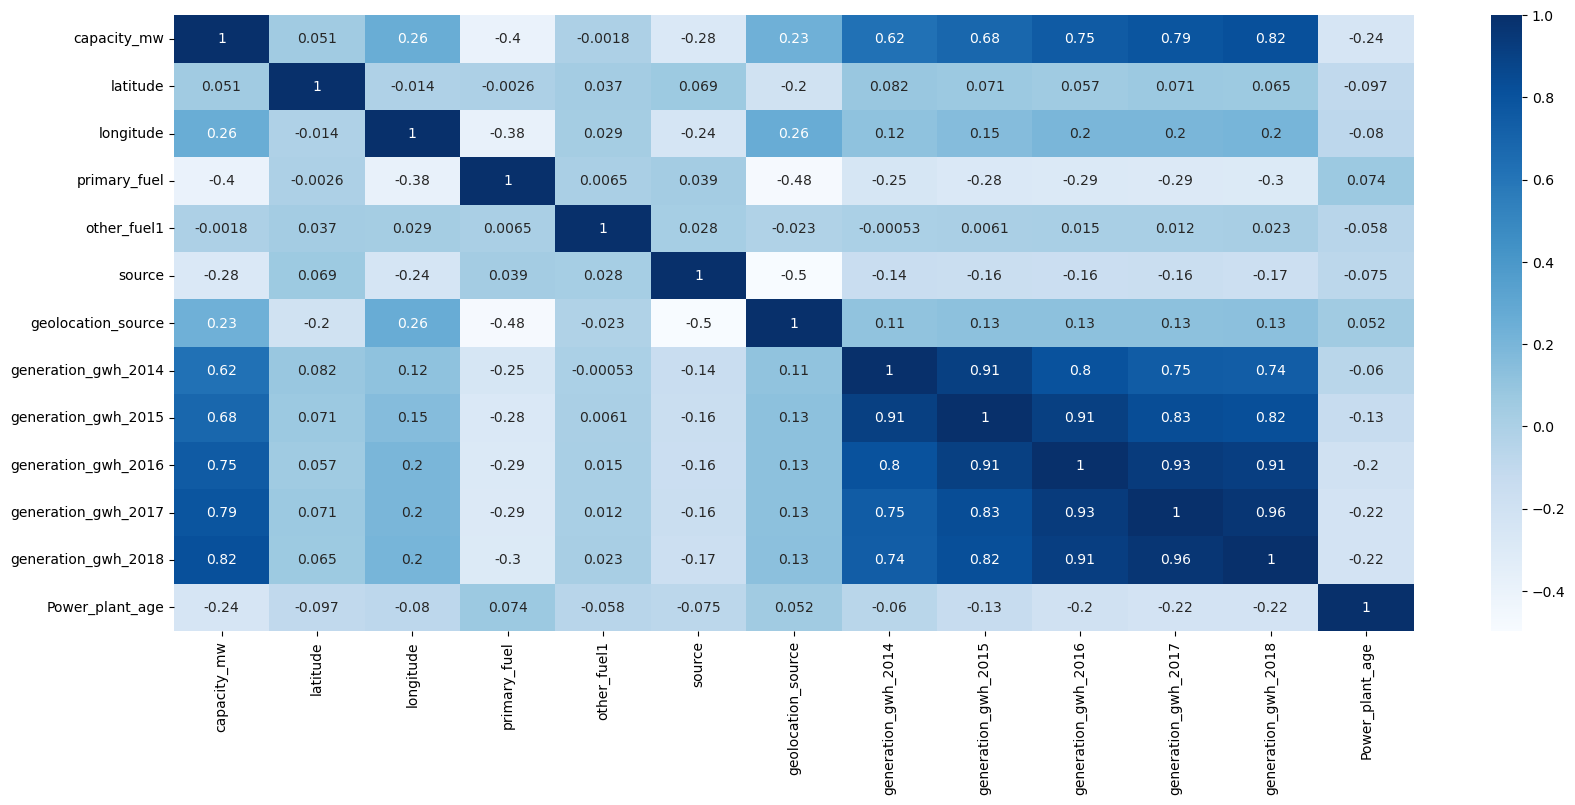

In [220]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot = True, cmap="Blues")

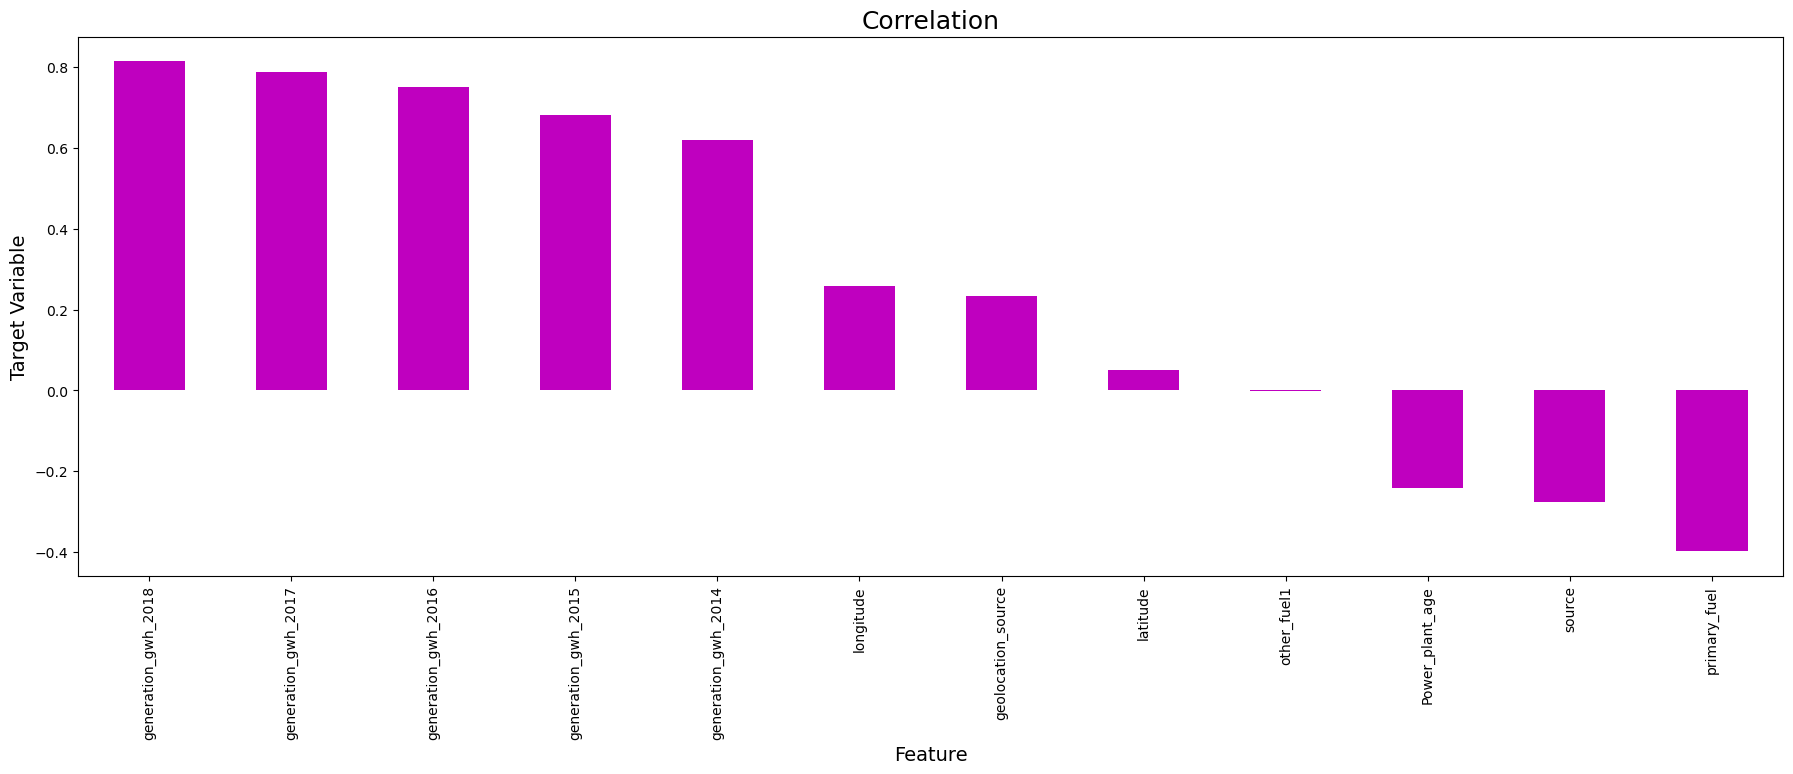

In [221]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target Variable',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can easily notice that generation_gwh_2018 is positively correlated with target(capacity_mw) and source is negatively correlated with target(capacity_mw) also other_fuel has very less correlation with target(capacity_mw) between the features and the label.

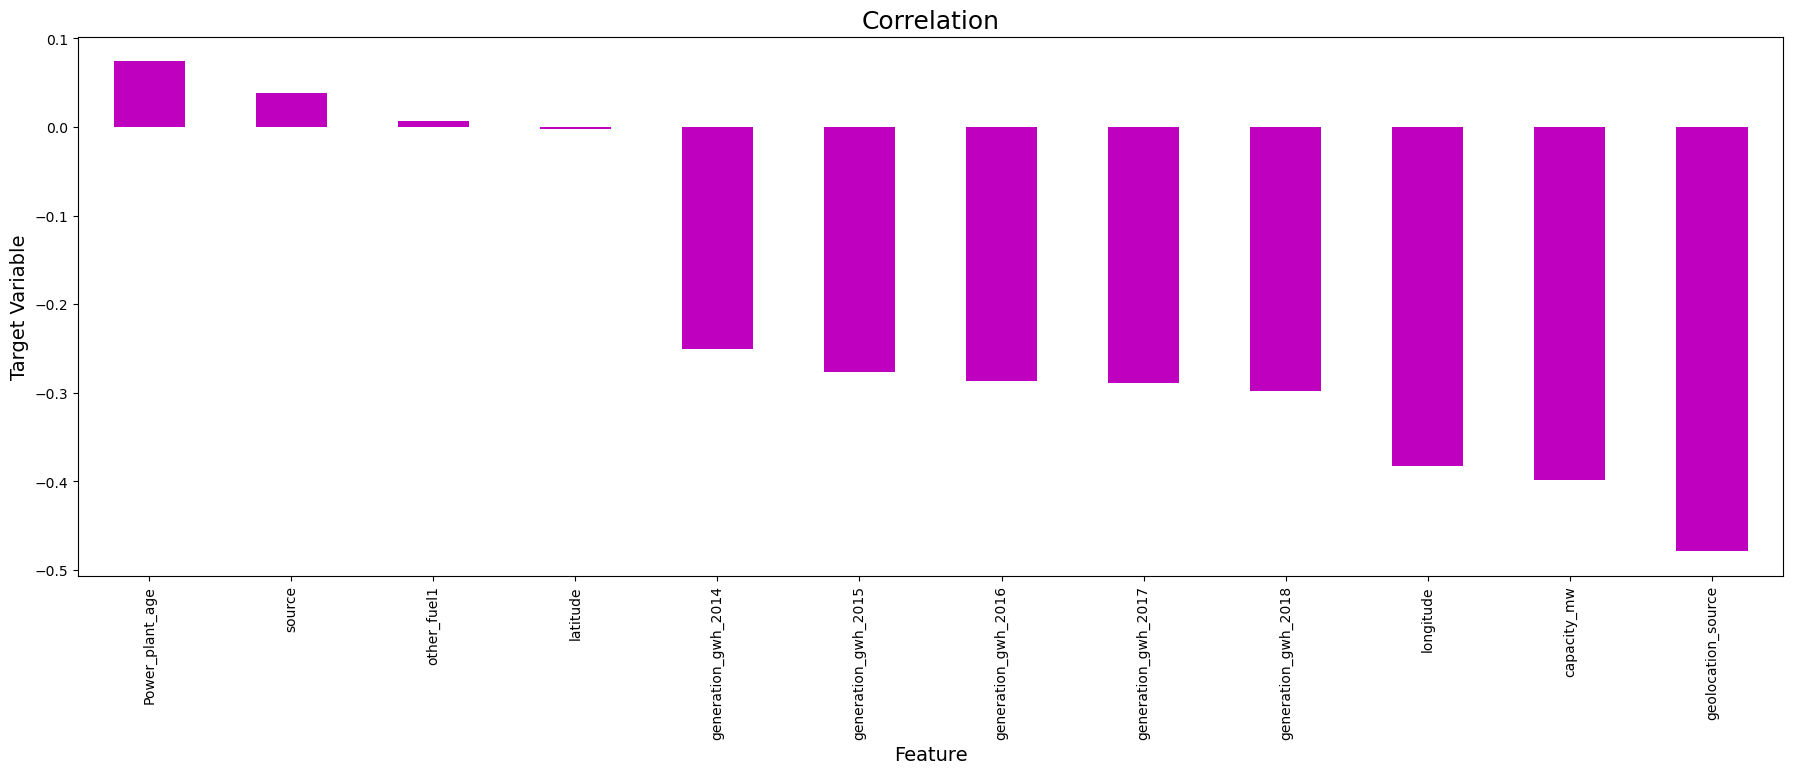

In [222]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target Variable',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can easily notice that power_plant_age is positively correlated with target(primary_fuel) and geloaction_source is negatively correlated with target(primary_fuel) also latitude is very little correlated with the target(primary_fuel)

Since other_fuel and latitude has very less correlation with both the target so dropping these two columns

In [223]:
df.drop('other_fuel1',axis=1,inplace=True)
df.drop('latitude',axis=1,inplace=True)

In [224]:
df

capacity_mw  longitude  primary_fuel  source  geolocation_source  \
0            2.5    73.2407             6     109                   1   
1           98.0    74.6090             1     174                   2   
2           39.2    69.3732             7      21                   2   
3          135.0    91.3602             2      22                   2   
4         1800.0    82.4091             1      22                   2   
..           ...        ...           ...     ...                 ...   
902       1600.0    77.3568             1      22                   2   
903          3.0    78.1654             6      77                   0   
904         25.5    75.5811             7      21                   2   
905         80.0    73.7477             1      59                   2   
906         16.5    77.4768             7      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             801.123775           711.181225           737.205450   
1             801.123775           711.181225           737.205450   
2             801.123775           711.181225           737.205450   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902           801.123775             0.994875           233.596650   
903           801.123775           711.181225           737.205450   
904           801.123775           711.181225           737.205450   
905           801.123775           711.181225           737.205450   
906           801.123775           711.181225           737.205450   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0             817.977250           751.644375              7.0  
1             817.977250           751.644375             17.0  
2             817.977250           751.644375             17.0  
3             663.774500           626.239128             14.0  
4            5385.579736          7279.000000              3.0  
..                   ...                  ...              ...  
902           865.400000           686.500000              2.0  
903           817.977250           751.644375             17.0  
904           817.977250           751.644375             17.0  
905           817.977250           751.644375             17.0  
906           817.977250           751.644375             17.0  

[851 rows x 11 columns]

In [225]:
df.shape

(851, 11)

1. Prediction for capacity_mw

In [61]:
x= df.drop('capacity_mw',axis=1)
y= df['capacity_mw']

In [62]:
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [63]:
features = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
x[features] = scaler.fit_transform(x[features].values)

In [64]:
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

Here successfully removed the skewness from all the numerical columns 

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

longitude  primary_fuel    source  geolocation_source  \
0    -0.922012      1.175506  1.397951           -1.036523   
1    -0.499829     -0.975797  2.821796            0.407145   
2    -2.377759      1.605767 -0.529717            0.407145   
3     2.430594     -0.545536 -0.507812            0.407145   
4     1.261979     -0.975797 -0.507812            0.407145   
..         ...           ...       ...                 ...   
846   0.231932     -0.975797 -0.507812            0.407145   
847   0.421592      1.175506  0.696980           -2.480190   
848  -0.224400      1.605767 -0.529717            0.407145   
849  -0.760624     -0.975797  0.302685            0.407145   
850   0.260758      1.605767 -0.529717            0.407145   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.044061            -0.049141            -0.046103   
1              -0.044061            -0.049141            -0.046103   
2              -0.044061            -0.049141            -0.046103   
3              -0.268922             0.093773             0.105691   
4               1.426798             2.286603             2.276671   
..                   ...                  ...                  ...   
846            -0.044061            -2.461379            -0.842266   
847            -0.044061            -0.049141            -0.046103   
848            -0.044061            -0.049141            -0.046103   
849            -0.044061            -0.049141            -0.046103   
850            -0.044061            -0.049141            -0.046103   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0              -0.035226            -0.057181        -1.081421  
1              -0.035226            -0.057181         0.046187  
2              -0.035226            -0.057181         0.046187  
3              -0.199692            -0.194159        -0.245810  
4               1.983083             2.347272        -1.758384  
..                   ...                  ...              ...  
846             0.010837            -0.126054        -1.980960  
847            -0.035226            -0.057181         0.046187  
848            -0.035226            -0.057181         0.046187  
849            -0.035226            -0.057181         0.046187  
850            -0.035226            -0.057181         0.046187  

[851 rows x 10 columns]

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features'] = x.columns
vif

VIF values             features
0    1.309948            longitude
1    1.682645         primary_fuel
2    1.503721               source
3    1.875750   geolocation_source
4    3.603333  generation_gwh_2014
5    6.182235  generation_gwh_2015
6    9.957776  generation_gwh_2016
7    9.750143  generation_gwh_2017
8    8.951489  generation_gwh_2018
9    1.102659      Power_plant_age

Here we can observe all the columns have VIF less than 10 which means we are free from multicolinearity problem 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [89]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  0.8832512022257857 on Random_state  111


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [91]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_RFR))
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score for test data:  0.888256118627504
R2_score on training data:  96.34124506955808
Mean Absolute Error:  85.09503549843588
Mean Squared Error:  21308.48721092052
Root Mean Squared Error:  145.97426900286408


In [92]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_LR))
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score for test data:  0.7020759692789218
R2_score on training data:  54.53444114071846
Mean Absolute Error:  180.40802401888845
Mean Squared Error:  56811.25731872533
Root Mean Squared Error:  238.35112191622957


In [93]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_knn))
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score for test data:  0.8984991396029698
R2_score on training data:  80.22324651206029
Mean Absolute Error:  71.82986549707601
Mean Squared Error:  19355.241281245613
Root Mean Squared Error:  139.12311555325957


In [94]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_DTR))
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score for test data:  0.6275834762154171
R2_score on training data:  99.98759946939086
Mean Absolute Error:  124.53325146198829
Mean Squared Error:  71016.26180091228
Root Mean Squared Error:  266.48876486807524


In [95]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_GBR))
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score for test data:  0.8683608456353454
R2_score on training data:  94.01615481858906
Mean Absolute Error:  91.13149371880588
Mean Squared Error:  25102.325091833158
Root Mean Squared Error:  158.4371329323816


In [96]:
LS=Lasso()
LS.fit(x_train,y_train)
pred_LS=LS.predict(x_test)
pred_train=LS.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_LS))
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_LS))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_LS))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_LS)))

R2_score for test data:  0.7006372826403974
R2_score on training data:  54.518981127746
Mean Absolute Error:  181.11872227099778
Mean Squared Error:  57085.60107214594
Root Mean Squared Error:  238.92593218850467


In [97]:
RG=Ridge()
RG.fit(x_train,y_train)
pred_RG=RG.predict(x_test)
pred_train=RG.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_RG))
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_RG))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_RG))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_RG)))

R2_score for test data:  0.7019968669979011
R2_score on training data:  54.53426299101408
Mean Absolute Error:  180.4608579823234
Mean Squared Error:  56826.34136559018
Root Mean Squared Error:  238.3827623079953


In [107]:
score=cross_val_score(RFR,x,y,cv=5)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_RFR)-score.mean()))

[0.82369609 0.80686329 0.71169746 0.78662146 0.77558055]
0.7808917697351244
Difference between R2 score and cross validation score is:  0.10736434889237956


In [99]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_LR)-score1.mean()))

[0.49848437 0.53113927 0.49820792 0.59358803 0.59879754]
0.544043425956701
Difference between R2 score and cross validation score is:  0.15803254332222083


In [100]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_knn)-score2.mean()))

[0.80064518 0.68744637 0.66681731 0.73030302 0.73782571]
0.7246075187248919
Difference between R2 score and cross validation score is:  0.17389162087807786


In [105]:
score3=cross_val_score(DTR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_DTR)-score3.mean()))

[0.57574492 0.47044033 0.65788769 0.61704981 0.68807395]
0.6018393387507893
Difference between R2 score and cross validation score is:  0.02574413746462778


In [102]:
score4=cross_val_score(GBR,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_GBR)-score4.mean()))

[0.78549494 0.78426748 0.7013468  0.71893235 0.76669367]
0.7513470478936812
Difference between R2 score and cross validation score is:  0.1170137977416642


In [103]:
score5=cross_val_score(LS,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_LS)-score5.mean()))

[0.50576306 0.53256809 0.497744   0.59801452 0.59924508]
0.5466669491385406
Difference between R2 score and cross validation score is:  0.15397033350185674


In [104]:
score6=cross_val_score(RG,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_RG)-score6.mean()))

[0.49915537 0.53159683 0.49810639 0.59463395 0.5984923 ]
0.5443969660610574
Difference between R2 score and cross validation score is:  0.15759990093684373


I am selecting RandomForestRegressor as the best Working model as it has the highest R2 score.

In [108]:
from sklearn.model_selection import GridSearchCV
param ={'n_estimators':[100],
        'criterion':['squared_error'], 
        'max_depth':[None], 
        'min_samples_split':[2], 
        'min_samples_leaf':[1], 
        'min_weight_fraction_leaf':[0.0], 
        'max_features':[1.0], 
        'max_leaf_nodes':[None], 
        'min_impurity_decrease':[0.0], 
        'bootstrap':[True], 
        'oob_score':[False], 
        'n_jobs':[None], 
        'random_state':[None], 
        'verbose':[0], 
        'warm_start':[False], 
        'ccp_alpha':[0.0], 
        'max_samples':[None]
       }

In [109]:
GSCV = GridSearchCV(RandomForestRegressor(),param,cv=17)

In [110]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=17, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'criterion': ['squared_error'], 'max_depth': [None],
                         'max_features': [1.0], 'max_leaf_nodes': [None],
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [None],
                         'verbose': [0], 'warm_start': [False]})

In [111]:
GSCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [121]:
Model_capacity = RandomForestRegressor(n_estimators=100,criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
CLassifer=Model_capacity.fit(x_train,y_train)
lr_pred=Model_capacity.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred)
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 89.0444468142788


As we can see the Accuracy is increased from 88.82% to 89.04% same so saving the model

In [122]:
import joblib
joblib.dump(Model_capacity,"Global_Power_Plant_capacity.pkl")

['Global_Power_Plant_capacity.pkl']

In [123]:
model = joblib.load("Global_Power_Plant_capacity.pkl")
prediction=model.predict(x_test)
prediction

array([   5.        ,   86.6117    ,   42.896     ,    2.        ,
        580.9643    ,  318.55226   ,   24.592     ,   16.33      ,
          9.498     ,   75.0122    ,   26.313     ,  590.215     ,
       1136.05      ,   20.5077    , 1211.39      ,   11.03986667,
          9.303     ,  419.1876    ,    5.47      ,   60.456     ,
         78.124     ,  215.2801    ,  566.31812   , 1377.6       ,
         82.714     , 1399.6978    ,   62.996     ,  643.9728    ,
         16.844     ,   11.84853333,  122.9598    ,   10.068     ,
        123.6095    ,   26.751     ,   15.028     ,   79.1927    ,
          9.74526667,  955.4302    , 1444.        , 1341.5       ,
         22.215     ,  925.29274   ,    6.624     ,   70.6631    ,
        108.9425    ,   38.174     ,   49.698     ,   61.915     ,
         67.431     , 1274.        ,  107.253     ,   30.281     ,
         43.8382    ,  102.82      ,   37.919     ,  304.98634   ,
        318.07406   ,  333.46526   ,  331.95278   ,    9.485  

In [124]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

Predicted  Original
0       5.00000     5.000
1      86.61170   270.000
2      42.89600    25.500
3       2.00000     5.000
4     580.96430   374.571
..          ...       ...
166   200.77300   220.000
167   126.09000   270.000
168   222.21544   126.000
169   215.71800     5.000
170  1295.60000  1500.000

[171 rows x 2 columns]

In [125]:
conclusion=pd.DataFrame([Model_capacity.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

0         1       2    3         4          5       6      7    \
Predicted  5.0   86.6117  42.896  2.0  580.9643  318.55226  24.592  16.33   
Original   5.0  270.0000  25.500  5.0  374.5710  207.00000   1.700   9.35   

              8        9    ...     161       162        163     164     165  \
Predicted   9.498  75.0122  ...  15.693  237.6159  1090.0298  34.216  10.296   
Original   15.000  98.0000  ...  39.000   48.0000  1600.0000  16.500   4.000   

               166     167        168      169     170  
Predicted  200.773  126.09  222.21544  215.718  1295.6  
Original   220.000  270.00  126.00000    5.000  1500.0  

[2 rows x 171 columns]

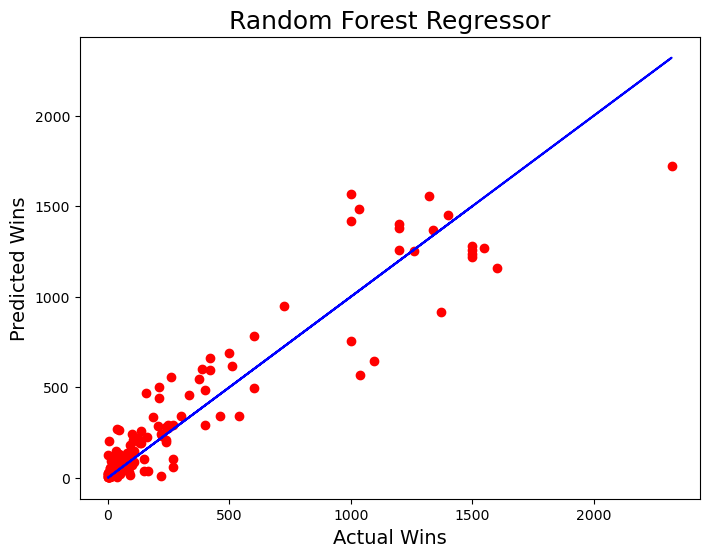

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_RFR,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.savefig('RFR.png')
plt.show()

2. Prediction for primary_fuel

In [226]:
df_fuel = df.drop("primary_fuel", axis=1)
df_fuel_1 = df["primary_fuel"]

In [227]:
df_fuel.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe the skewness in all the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these coluns

In [228]:
features= ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_fuel[features] = scaler.fit_transform(df_fuel[features].values)

In [229]:
df_fuel.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

As we can see that we have removed the skewness from all the numerical columns

In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_fuel = pd.DataFrame(scaler.fit_transform(df_fuel), columns=df_fuel.columns)
df_fuel

capacity_mw  longitude    source  geolocation_source  \
0      -1.677389  -0.922012  1.397951           -1.036523   
1       0.220284  -0.499829  2.821796            0.407145   
2      -0.274381  -2.377759 -0.529717            0.407145   
3       0.391670   2.430594 -0.507812            0.407145   
4       1.731859   1.261979 -0.507812            0.407145   
..           ...        ...       ...                 ...   
846     1.672840   0.231932 -0.507812            0.407145   
847    -1.598186   0.421592  0.696980           -2.480190   
848    -0.507278  -0.224400 -0.529717            0.407145   
849     0.111201  -0.760624  0.302685            0.407145   
850    -0.741846   0.260758 -0.529717            0.407145   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.044061            -0.049141            -0.046103   
1              -0.044061            -0.049141            -0.046103   
2              -0.044061            -0.049141            -0.046103   
3              -0.268922             0.093773             0.105691   
4               1.426798             2.286603             2.276671   
..                   ...                  ...                  ...   
846            -0.044061            -2.461379            -0.842266   
847            -0.044061            -0.049141            -0.046103   
848            -0.044061            -0.049141            -0.046103   
849            -0.044061            -0.049141            -0.046103   
850            -0.044061            -0.049141            -0.046103   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0              -0.035226            -0.057181        -1.081421  
1              -0.035226            -0.057181         0.046187  
2              -0.035226            -0.057181         0.046187  
3              -0.199692            -0.194159        -0.245810  
4               1.983083             2.347272        -1.758384  
..                   ...                  ...              ...  
846             0.010837            -0.126054        -1.980960  
847            -0.035226            -0.057181         0.046187  
848            -0.035226            -0.057181         0.046187  
849            -0.035226            -0.057181         0.046187  
850            -0.035226            -0.057181         0.046187  

[851 rows x 10 columns]

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(df_fuel.values,i) for i in range(len(df_fuel.columns))]
vif["Features"] = df_fuel.columns
vif

VIF values             Features
0    1.811775          capacity_mw
1    1.193670            longitude
2    1.413037               source
3    1.590869   geolocation_source
4    3.621608  generation_gwh_2014
5    6.190754  generation_gwh_2015
6    9.961303  generation_gwh_2016
7    9.767170  generation_gwh_2017
8    8.961146  generation_gwh_2018
9    1.153813      Power_plant_age

As we can see that all the columns are in vif range so our dataset is free from multicollinearity

In [232]:
df_fuel_1.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Here we can observe that the target variable primary_fuel has multi classes means it is a multiclassification problem,Also the data is not balanced so we will use oversampling method to balance the data.

In [233]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
df_fuel, df_fuel_1= SM.fit_resample(df_fuel,df_fuel_1)

In [234]:
df_fuel_1.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAccu=0
macRS=0
for i in range(1,200):
    df_fuel_train,df_fuel_test,df_fuel_1_train,df_fuel_1_test = train_test_split(df_fuel,df_fuel_1,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(df_fuel_train,df_fuel_1_train)
    pred = LR.predict(df_fuel_test)
    acc=accuracy_score(df_fuel_1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7534965034965035  on Random_state  168


In [236]:
df_fuel_train,df_fuel_test,df_fuel_1_train,df_fuel_1_test=train_test_split(df_fuel,df_fuel_1,test_size=.30,random_state=maxRS)

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [238]:
LR=LogisticRegression()
LR.fit(df_fuel_train,df_fuel_1_train)
y_pred = LR.predict(df_fuel_test)
print("Accuracy score: ", accuracy_score(df_fuel_1_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(df_fuel_1_test,y_pred))
print("Classification Report: ", classification_report(df_fuel_1_test,y_pred))

Accuracy score:  0.7534965034965035
Confusion Matrix:  [[70  0  0  1  0  0  0  6]
 [ 9 26  8  4 16  2  0  1]
 [ 1  9 29  9  2  7  0  4]
 [ 0 10  6 29  7  4  0 11]
 [ 0  0  0  1 70  1  0  0]
 [ 1  1  0  0  0 65  0  2]
 [ 1  4  0  0  0  0 72  0]
 [ 0  0  1 12  0  0  0 70]]
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.91      0.88        77
           1       0.52      0.39      0.45        66
           2       0.66      0.48      0.55        61
           3       0.52      0.43      0.47        67
           4       0.74      0.97      0.84        72
           5       0.82      0.94      0.88        69
           6       1.00      0.94      0.97        77
           7       0.74      0.84      0.79        83

    accuracy                           0.75       572
   macro avg       0.73      0.74      0.73       572
weighted avg       0.74      0.75      0.74       572



In [239]:
DTC=DecisionTreeClassifier()
DTC.fit(df_fuel_train,df_fuel_1_train)
y_pred = DTC.predict(df_fuel_test)
print("Accuracy score: ", accuracy_score(df_fuel_1_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(df_fuel_1_test,y_pred))
print("Classification Report: ", classification_report(df_fuel_1_test,y_pred))

Accuracy score:  0.8793706293706294
Confusion Matrix:  [[73  1  3  0  0  0  0  0]
 [ 4 38  8 10  4  2  0  0]
 [ 0  4 44  6  3  4  0  0]
 [ 0  3  9 53  2  0  0  0]
 [ 0  0  0  1 71  0  0  0]
 [ 1  1  1  1  0 65  0  0]
 [ 1  0  0  0  0  0 76  0]
 [ 0  0  0  0  0  0  0 83]]
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.95      0.94        77
           1       0.81      0.58      0.67        66
           2       0.68      0.72      0.70        61
           3       0.75      0.79      0.77        67
           4       0.89      0.99      0.93        72
           5       0.92      0.94      0.93        69
           6       1.00      0.99      0.99        77
           7       1.00      1.00      1.00        83

    accuracy                           0.88       572
   macro avg       0.87      0.87      0.87       572
weighted avg       0.88      0.88      0.88       572



In [240]:
RFC=RandomForestClassifier()
RFC.fit(df_fuel_train,df_fuel_1_train)
y_pred = RFC.predict(df_fuel_test)
print("Accuracy score: ", accuracy_score(df_fuel_1_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(df_fuel_1_test,y_pred))
print("Classification Report: ", classification_report(df_fuel_1_test,y_pred))

Accuracy score:  0.916083916083916
Confusion Matrix:  [[77  0  0  0  0  0  0  0]
 [ 4 49  5  4  3  1  0  0]
 [ 0  6 49  3  0  3  0  0]
 [ 0  7  6 53  1  0  0  0]
 [ 0  0  0  1 71  0  0  0]
 [ 1  1  0  1  0 66  0  0]
 [ 1  0  0  0  0  0 76  0]
 [ 0  0  0  0  0  0  0 83]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      1.00      0.96        77
           1       0.78      0.74      0.76        66
           2       0.82      0.80      0.81        61
           3       0.85      0.79      0.82        67
           4       0.95      0.99      0.97        72
           5       0.94      0.96      0.95        69
           6       1.00      0.99      0.99        77
           7       1.00      1.00      1.00        83

    accuracy                           0.92       572
   macro avg       0.91      0.91      0.91       572
weighted avg       0.91      0.92      0.91       572



In [241]:
svm=SVC()
svm.fit(df_fuel_train,df_fuel_1_train)
y_pred = svm.predict(df_fuel_test)
print("Accuracy score: ", accuracy_score(df_fuel_1_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(df_fuel_1_test,y_pred))
print("Classification Report: ", classification_report(df_fuel_1_test,y_pred))

Accuracy score:  0.8304195804195804
Confusion Matrix:  [[70  0  0  0  0  0  0  7]
 [11 30 11  1 10  1  0  2]
 [ 0  3 44  3  1  8  0  2]
 [ 0  8 10 36  4  0  0  9]
 [ 0  0  1  0 71  0  0  0]
 [ 0  1  0  0  0 66  0  2]
 [ 0  0  0  0  0  0 77  0]
 [ 0  0  2  0  0  0  0 81]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.91      0.89        77
           1       0.71      0.45      0.56        66
           2       0.65      0.72      0.68        61
           3       0.90      0.54      0.67        67
           4       0.83      0.99      0.90        72
           5       0.88      0.96      0.92        69
           6       1.00      1.00      1.00        77
           7       0.79      0.98      0.87        83

    accuracy                           0.83       572
   macro avg       0.83      0.82      0.81       572
weighted avg       0.83      0.83      0.82       572



In [242]:
knn=KNN()
knn.fit(df_fuel_train,df_fuel_1_train)
y_pred = knn.predict(df_fuel_test)
print("Accuracy score: ", accuracy_score(df_fuel_1_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(df_fuel_1_test,y_pred))
print("Classification Report: ", classification_report(df_fuel_1_test,y_pred))

Accuracy score:  0.8583916083916084
Confusion Matrix:  [[75  0  0  0  0  0  0  2]
 [ 9 32 10  4  6  4  0  1]
 [ 0  3 50  2  1  5  0  0]
 [ 1  4 14 41  1  1  0  5]
 [ 0  0  1  0 71  0  0  0]
 [ 2  0  2  0  0 65  0  0]
 [ 0  0  0  0  0  0 77  0]
 [ 0  0  0  2  0  1  0 80]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.97      0.91        77
           1       0.82      0.48      0.61        66
           2       0.65      0.82      0.72        61
           3       0.84      0.61      0.71        67
           4       0.90      0.99      0.94        72
           5       0.86      0.94      0.90        69
           6       1.00      1.00      1.00        77
           7       0.91      0.96      0.94        83

    accuracy                           0.86       572
   macro avg       0.85      0.85      0.84       572
weighted avg       0.86      0.86      0.85       572



In [243]:
GBC=GradientBoostingClassifier()
GBC.fit(df_fuel_train,df_fuel_1_train)
y_pred = GBC.predict(df_fuel_test)
print("Accuracy score: ", accuracy_score(df_fuel_1_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(df_fuel_1_test,y_pred))
print("Classification Report: ", classification_report(df_fuel_1_test,y_pred))

Accuracy score:  0.9020979020979021
Confusion Matrix:  [[73  1  3  0  0  0  0  0]
 [ 4 49  4  3  5  1  0  0]
 [ 0  5 51  3  0  2  0  0]
 [ 0  7  9 48  2  1  0  0]
 [ 0  0  0  0 71  1  0  0]
 [ 0  2  1  1  0 65  0  0]
 [ 0  1  0  0  0  0 76  0]
 [ 0  0  0  0  0  0  0 83]]
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95        77
           1       0.75      0.74      0.75        66
           2       0.75      0.84      0.79        61
           3       0.87      0.72      0.79        67
           4       0.91      0.99      0.95        72
           5       0.93      0.94      0.94        69
           6       1.00      0.99      0.99        77
           7       1.00      1.00      1.00        83

    accuracy                           0.90       572
   macro avg       0.90      0.89      0.89       572
weighted avg       0.90      0.90      0.90       572



In [244]:
BG=BaggingClassifier()
BG.fit(df_fuel_train,df_fuel_1_train)
y_pred = BG.predict(df_fuel_test)
print("Accuracy score: ", accuracy_score(df_fuel_1_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(df_fuel_1_test,y_pred))
print("Classification Report: ", classification_report(df_fuel_1_test,y_pred))

Accuracy score:  0.9108391608391608
Confusion Matrix:  [[73  1  3  0  0  0  0  0]
 [ 3 50  5  3  4  1  0  0]
 [ 0  8 49  1  0  3  0  0]
 [ 0  6  6 53  1  1  0  0]
 [ 0  0  0  0 72  0  0  0]
 [ 0  0  3  1  0 65  0  0]
 [ 1  0  0  0  0  0 76  0]
 [ 0  0  0  0  0  0  0 83]]
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95        77
           1       0.77      0.76      0.76        66
           2       0.74      0.80      0.77        61
           3       0.91      0.79      0.85        67
           4       0.94      1.00      0.97        72
           5       0.93      0.94      0.94        69
           6       1.00      0.99      0.99        77
           7       1.00      1.00      1.00        83

    accuracy                           0.91       572
   macro avg       0.90      0.90      0.90       572
weighted avg       0.91      0.91      0.91       572



In [245]:
score=cross_val_score(LR,df_fuel,df_fuel_1,cv=5)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(df_fuel_1_test,y_pred)-score.mean()))

[0.72440945 0.74278215 0.7191601  0.69816273 0.72105263]
0.7211134134548971
Difference between accuracy score and cross validation score is:  0.18972574738426373


In [246]:
score1=cross_val_score(DTC,df_fuel,df_fuel_1)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(df_fuel_1_test,y_pred)-score1.mean()))

[0.83464567 0.87401575 0.89238845 0.89238845 0.88157895]
0.875003453515679
Difference between accuracy score and cross validation score is:  0.03583570732348185


In [247]:
score3=cross_val_score(RFC,df_fuel,df_fuel_1)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(df_fuel_1_test,y_pred)-score3.mean()))

[0.87926509 0.9160105  0.95013123 0.92388451 0.91842105]
0.9175424782428513
Difference between accuracy score and cross validation score is:  -0.006703317403690456


In [248]:
score4=cross_val_score(svm,df_fuel,df_fuel_1)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(df_fuel_1_test,y_pred)-score4.mean()))

[0.79265092 0.81627297 0.82414698 0.80577428 0.78421053]
0.804611134134549
Difference between accuracy score and cross validation score is:  0.10622802670461184


In [249]:
score5=cross_val_score(knn,df_fuel,df_fuel_1)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(df_fuel_1_test,y_pred)-score5.mean()))

[0.82677165 0.84776903 0.8687664  0.85564304 0.83157895]
0.8461058157204034
Difference between accuracy score and cross validation score is:  0.06473334511875739


In [250]:
score6=cross_val_score(GBC,df_fuel,df_fuel_1)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(df_fuel_1_test,y_pred)-score6.mean()))

[0.88713911 0.91076115 0.92125984 0.9160105  0.90789474]
0.9086130681033293
Difference between accuracy score and cross validation score is:  0.0022260927358315197


In [251]:
score7=cross_val_score(BG,df_fuel,df_fuel_1)
print(score7)
print(score7.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(df_fuel_1_test,y_pred)-score7.mean()))

[0.87139108 0.90813648 0.92388451 0.90288714 0.91578947]
0.9044177372565271
Difference between accuracy score and cross validation score is:  0.006421423582633756


I am selecting RandomForestClassifier as the best working Model as the accuracy for this model is highest and also the difference between the accuracy score and cross validation score is minimum for this

In [252]:
param_grid = {'n_estimators':[100], 
              'criterion':['gini'], 
              'max_depth':[None], 
              'min_samples_split':[2], 
              'min_samples_leaf':[1], 
              'min_weight_fraction_leaf':[0.0], 
              'max_features':['sqrt'], 
              'max_leaf_nodes':[None], 
              'min_impurity_decrease':[0.0], 
              'bootstrap':[True], 
              'oob_score':[False], 
              'n_jobs':[None], 
              'random_state':[None], 
              'verbose':[0], 
              'warm_start':[False], 'class_weight':[None], 'ccp_alpha':[0.0], 'max_samples':[None]
             }

In [253]:
from sklearn.model_selection import GridSearchCV

In [254]:
GSCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=18)

In [255]:
GSCV.fit(df_fuel_train,df_fuel_1_train)

GridSearchCV(cv=18, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [None],
                         'verbose': [0], 'warm_start': [False]})

In [256]:
GSCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [262]:
Model_fuel = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
Model_fuel.fit(df_fuel_train,df_fuel_1_train)
pred = Model_fuel.predict(df_fuel_test)
print("Accuracy Score: " , accuracy_score(df_fuel_1_test,pred))

Accuracy Score:  0.9283216783216783


As we can see the accuracy is increased in points it was 91.60% now it is 92.83 almost 93% which is very good accuracy so saving our model

In [264]:
import joblib
joblib.dump(Model_fuel, "Global_Power_Plant_fuel.pkl")

['Global_Power_Plant_fuel.pkl']

In [265]:
model = joblib.load("Global_Power_Plant_fuel.pkl")
prediction=model.predict(df_fuel_test)
prediction

array([7, 1, 0, 2, 0, 7, 7, 3, 7, 5, 7, 3, 4, 1, 0, 7, 0, 1, 4, 6, 3, 2,
       3, 6, 2, 3, 1, 6, 0, 2, 2, 0, 1, 2, 5, 0, 3, 6, 4, 7, 6, 4, 6, 0,
       7, 2, 6, 1, 7, 0, 6, 2, 6, 7, 4, 4, 5, 5, 0, 7, 6, 4, 3, 4, 5, 2,
       4, 7, 7, 0, 5, 6, 1, 2, 1, 7, 7, 0, 7, 6, 1, 0, 3, 0, 2, 4, 7, 4,
       7, 7, 7, 3, 4, 4, 6, 7, 0, 6, 0, 5, 5, 2, 5, 4, 2, 2, 5, 4, 6, 6,
       6, 6, 2, 7, 2, 2, 1, 0, 0, 3, 4, 0, 2, 3, 3, 6, 3, 2, 7, 4, 2, 3,
       3, 4, 2, 0, 6, 5, 0, 1, 7, 5, 0, 2, 7, 0, 6, 5, 2, 7, 3, 1, 4, 4,
       4, 2, 3, 4, 3, 1, 7, 0, 0, 6, 7, 5, 0, 5, 3, 7, 4, 6, 2, 0, 7, 5,
       0, 2, 0, 6, 7, 2, 6, 3, 2, 0, 1, 1, 7, 5, 7, 0, 7, 7, 5, 5, 5, 0,
       5, 7, 2, 7, 7, 5, 4, 2, 4, 5, 4, 7, 5, 5, 5, 1, 5, 6, 6, 2, 4, 7,
       0, 6, 2, 4, 2, 5, 3, 7, 1, 0, 1, 0, 2, 6, 4, 5, 7, 1, 4, 4, 3, 6,
       4, 7, 5, 3, 2, 1, 7, 0, 5, 1, 3, 4, 0, 5, 5, 7, 4, 2, 4, 0, 2, 5,
       2, 0, 5, 4, 1, 0, 6, 7, 6, 2, 6, 1, 5, 1, 6, 1, 4, 2, 1, 2, 1, 3,
       3, 3, 7, 6, 6, 1, 2, 4, 3, 3, 7, 2, 6, 2, 0,

In [266]:
a=np.array(df_fuel_1_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

Predicted  Original
0            7         7
1            1         1
2            0         0
3            2         2
4            0         0
..         ...       ...
567          4         4
568          3         3
569          5         5
570          1         3
571          7         7

[572 rows x 2 columns]

In [267]:
conclusion=pd.DataFrame([Model_fuel.predict(df_fuel_test)[:],df_fuel_1_test[:]],index=["Predicted","Original"])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  562  563  \
Predicted    7    1    0    2    0    7    7    3    7    5  ...    1    1   
Original     7    1    0    2    0    7    7    1    7    5  ...    0    1   

           564  565  566  567  568  569  570  571  
Predicted    0    4    4    4    3    5    1    7  
Original     1    4    4    4    3    5    3    7  

[2 rows x 572 columns]

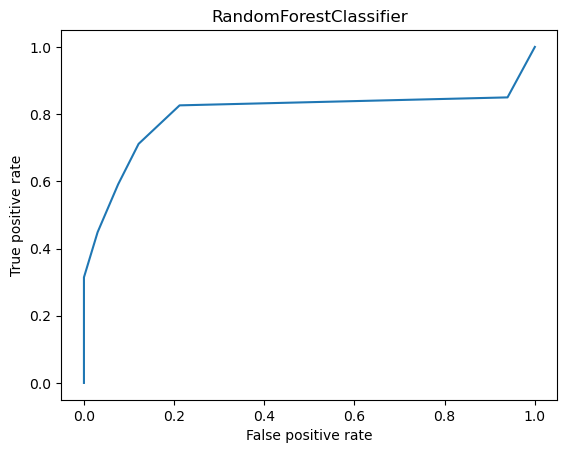

In [268]:
tpr,fpr,thresholds = roc_curve(df_fuel_1_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()